In [1]:
%matplotlib inline 
import pandas as pd
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import feature_selection_ga as ga
import fitness_function as ff
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score,precision_score, log_loss, auc,roc_auc_score,roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.ensemble import BalanceCascade
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load datasets

In [2]:
alff_raw = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_raw.xlsx')
alff_raw_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_raw_balanced.xlsx')
alff_raw_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_raw_feat.xlsx')
alff_raw_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_raw_feat_balanced.xlsx')
alff_bin = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_bin.xlsx')
alff_bin_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_bin_balanced.xlsx')
alff_bin_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_bin_feat.xlsx')
alff_bin_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_bin_feat_balanced.xlsx')

alff_phenotypic_raw = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_raw.xlsx')
alff_phenotypic_raw_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_raw_balanced.xlsx')
alff_phenotypic_raw_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_raw_feat.xlsx')
alff_phenotypic_raw_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_raw_feat_balanced.xlsx')
alff_phenotypic_bin = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_bin.xlsx')
alff_phenotypic_bin_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_bin_balanced.xlsx')
alff_phenotypic_bin_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_bin_feat.xlsx')
alff_phenotypic_bin_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/alff_phenotypic_bin_feat_balanced.xlsx')

phenotypic_raw = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_raw.xlsx')
phenotypic_raw_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_raw_balanced.xlsx')
phenotypic_raw_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_raw_feat.xlsx')
phenotypic_raw_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_raw_feat_balanced.xlsx')
phenotypic_bin = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_bin.xlsx')
phenotypic_bin_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_bin_balanced.xlsx')
phenotypic_bin_feat = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_bin_feat.xlsx')
phenotypic_bin_feat_balanced = pd.read_excel('/home/kevrodz/Documents/ADHD_200/Data/phenotypic_bin_feat_balanced.xlsx')

# Prepare datasets

In [3]:
def to_array(data):
    array = data.values
    x = array[:, 0:len(data.columns)-1]
    y = array[:, len(data.columns)-1]
    return x,y

In [4]:
x_ar, y_ar = to_array(alff_raw)
x_arb, y_arb = to_array(alff_raw_balanced)
x_arf, y_arf = to_array(alff_raw_feat)
x_arfb, y_arfb = to_array(alff_raw_feat_balanced)
x_ab, y_ab = to_array(alff_bin)
x_abb, y_abb = to_array(alff_bin_balanced)
x_abf, y_abf = to_array(alff_bin_feat)
x_abfb, y_abfb = to_array(alff_bin_feat_balanced)

x_apr, y_apr = to_array(alff_phenotypic_raw)
x_aprb, y_aprb = to_array(alff_phenotypic_raw_balanced)
x_aprf, y_aprf = to_array(alff_phenotypic_raw_feat)
x_aprfb, y_aprfb = to_array(alff_phenotypic_raw_feat_balanced)
x_apb, y_apb = to_array(alff_phenotypic_bin)
x_apbb, y_apbb = to_array(alff_phenotypic_bin_balanced)
x_apbf, y_apbf = to_array(alff_phenotypic_bin_feat)
x_apbfb, y_apbfb = to_array(alff_phenotypic_bin_feat_balanced)

x_pr, y_pr = to_array(phenotypic_raw)
x_prb, y_prb = to_array(phenotypic_raw_balanced)
x_prf, y_prf = to_array(phenotypic_raw_feat)
x_prfb, y_prfb = to_array(phenotypic_raw_feat_balanced)
x_pb, y_pb = to_array(phenotypic_bin)
x_pbb, y_pbb = to_array(phenotypic_bin_balanced)
x_pbf, y_pbf = to_array(phenotypic_bin_feat)
x_pbfb, y_pbfb = to_array(phenotypic_bin_feat_balanced)


In [5]:
x_ar_train, x_ar_test, y_ar_train, y_ar_test = train_test_split(x_ar, y_ar, test_size=0.30, random_state=42)
x_arb_train, x_arb_test, y_arb_train, y_arb_test = train_test_split(x_arb, y_arb, test_size=0.30, random_state=42)
x_arf_train, x_arf_test, y_arf_train, y_arf_test = train_test_split(x_arf, y_arf, test_size=0.30, random_state=42)
x_arfb_train, x_arfb_test, y_arfb_train, y_arfb_test = train_test_split(x_arfb, y_arfb, test_size=0.30, random_state=42)
x_ab_train, x_ab_test, y_ab_train, y_ab_test = train_test_split(x_ab, y_ab, test_size=0.30, random_state=42)
x_abb_train, x_abb_test, y_abb_train, y_abb_test = train_test_split(x_abb, y_abb, test_size=0.30, random_state=42)
x_abf_train, x_abf_test, y_abf_train, y_abf_test = train_test_split(x_abf, y_abf, test_size=0.30, random_state=42)
x_abfb_train, x_abfb_test, y_abfb_train, y_abfb_test = train_test_split(x_abfb, y_abfb, test_size=0.30, random_state=42)

x_apr_train, x_apr_test, y_apr_train, y_apr_test = train_test_split(x_apr, y_apr, test_size=0.30, random_state=42)
x_aprb_train, x_aprb_test, y_aprb_train, y_aprb_test = train_test_split(x_aprb, y_aprb, test_size=0.30, random_state=42)
x_aprf_train, x_aprf_test, y_aprf_train, y_aprf_test = train_test_split(x_aprf, y_aprf, test_size=0.30, random_state=42)
x_aprfb_train, x_aprfb_test, y_aprfb_train, y_aprfb_test = train_test_split(x_aprfb, y_aprfb, test_size=0.30, random_state=42)
x_apb_train, x_apb_test, y_apb_train, y_apb_test = train_test_split(x_apb, y_apb, test_size=0.30, random_state=42)
x_apbb_train, x_apbb_test, y_apbb_train, y_apbb_test = train_test_split(x_apbb, y_apbb, test_size=0.30, random_state=42)
x_apbf_train, x_apbf_test, y_apbf_train, y_apbf_test = train_test_split(x_apbf, y_apbf, test_size=0.30, random_state=42)
x_apbfb_train, x_apbfb_test, y_apbfb_train, y_apbfb_test = train_test_split(x_apbfb, y_apbfb, test_size=0.30, random_state=42)

x_pr_train, x_pr_test, y_pr_train, y_pr_test = train_test_split(x_pr, y_pr, test_size=0.30, random_state=42)
x_prb_train, x_prb_test, y_prb_train, y_prb_test = train_test_split(x_prb, y_prb, test_size=0.30, random_state=42)
x_prf_train, x_prf_test, y_prf_train, y_prf_test = train_test_split(x_prf, y_prf, test_size=0.30, random_state=42)
x_prfb_train, x_prfb_test, y_prfb_train, y_prfb_test = train_test_split(x_prfb, y_prfb, test_size=0.30, random_state=42)
x_pb_train, x_pb_test, y_pb_train, y_pb_test = train_test_split(x_pb, y_pb, test_size=0.30, random_state=42)
x_pbb_train, x_pbb_test, y_pbb_train, y_pbb_test = train_test_split(x_pbb, y_pbb, test_size=0.30, random_state=42)
x_pbf_train, x_pbf_test, y_pbf_train, y_pbf_test = train_test_split(x_pbf, y_pbf, test_size=0.30, random_state=42)
x_pbfb_train, x_pbfb_test, y_pbfb_train, y_pbfb_test = train_test_split(x_pbfb, y_pbfb, test_size=0.30, random_state=42)


In [6]:
datasets = []
datasets.append(("alff_raw",x_ar_train,x_ar_test,y_ar_train,y_ar_test,"Raw"))
datasets.append(("alff_raw_balanced",x_arb_train,x_arb_test,y_arb_train,y_arb_test,"Raw"))
datasets.append(("alff_raw_feat",x_arf_train,x_arf_test,y_arf_train,y_arf_test,"Raw"))
datasets.append(("alff_raw_feat_balanced",x_arfb_train,x_arfb_test,y_arfb_train,y_arfb_test,"Raw"))
datasets.append(("alff_bin",x_ab_train,x_ab_test,y_ab_train,y_ab_test,"Bin"))
datasets.append(("alff_bin_balanced",x_abb_train,x_abb_test,y_abb_train,y_abb_test,"Bin"))
datasets.append(("alff_bin_feat",x_abf_train,x_abf_test,y_abf_train,y_abf_test,"Bin"))
datasets.append(("alff_bin_feat_balanced",x_abfb_train,x_abfb_test,y_abfb_train,y_abfb_test,"Bin"))

datasets.append(("alff_phenotypic_raw",x_apr_train,x_apr_test,y_apr_train,y_apr_test,"Raw"))
datasets.append(("alff_phenotypic_raw_balanced",x_aprb_train,x_aprb_test,y_aprb_train,y_aprb_test,"Raw"))
datasets.append(("alff_phenotypic_raw_feat",x_aprf_train,x_aprf_test,y_aprf_train,y_aprf_test,"Raw"))
datasets.append(("alff_phenotypic_raw_feat_balanced",x_aprfb_train,x_aprfb_test,y_aprfb_train,y_aprfb_test,"Raw"))
datasets.append(("alff_phenotypic_bin",x_apb_train,x_apb_test,y_apb_train,y_apb_test,"Bin"))
datasets.append(("alff_phenotypic_bin_balanced",x_apbb_train,x_apbb_test,y_apbb_train,y_apbb_test,"Bin"))
datasets.append(("alff_phenotypic_bin_feat",x_apbf_train,x_apbf_test,y_apbf_train,y_apbf_test,"Bin"))
datasets.append(("alff_phenotypic_bin_feat_balanced",x_apbfb_train,x_apbfb_test,y_apbfb_train,y_apbfb_test,"Bin"))

datasets.append(("phenotypic_raw",x_pr_train,x_pr_test,y_pr_train,y_pr_test,"Raw"))
datasets.append(("phenotypic_raw_balanced",x_prb_train,x_prb_test,y_prb_train,y_prb_test,"Raw"))
datasets.append(("phenotypic_raw_feat",x_prf_train,x_prf_test,y_prf_train,y_prf_test,"Raw"))
datasets.append(("phenotypic_raw_feat_balanced",x_prfb_train,x_prfb_test,y_prfb_train,y_prfb_test,"Raw"))
datasets.append(("phenotypic_bin",x_pb_train,x_pb_test,y_pb_train,y_pb_test,"Bin"))
datasets.append(("phenotypic_bin_balanced",x_pbb_train,x_pbb_test,y_pbb_train,y_pbb_test,"Bin"))
datasets.append(("phenotypic_bin_feat",x_pbf_train,x_pbf_test,y_pbf_train,y_pbf_test,"Bin"))
datasets.append(("phenotypic_bin_feat_balanced",x_pbfb_train,x_pbfb_test,y_pbfb_train,y_pbfb_test,"Bin"))


In [7]:
def plot_roc_curve(fpr, tpr, auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.text(0.95, 0.01, str(auc),
        verticalalignment='bottom', horizontalalignment='right', fontsize=15)
    plt.show()

In [8]:
def fit_bin_model(name, x_train, x_test, y_train, y_test, n_neighbors = 2):
    
    classifiers = {"Random Forest":RandomForestClassifier(),
                 "Bagging-Decision Tree":BaggingClassifier(),
                 "Logistic Regression":LogisticRegression(),
                 "K-NN":KNeighborsClassifier(n_neighbors),
                  "Gaussian NB":GaussianNB()}
    fig, ax = plt.subplots(1,5,figsize = (40,15))
    scores = pd.DataFrame(columns=['data','model','acccuracy','recall','precision','f1','auc', 'confusion matrix'])
    i = 0
    for key, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        #y_pred_probs = classifier.predict_proba(x_test)
        #probs = classifier.decision_function(x_test)
        #fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Calculate ROC curve
        #auc = roc_auc_score(y_test, y_pred) # Calculate AUC
        #p, r, t = precision_recall_curve(y_test, probs)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, key, accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
        
        sns.heatmap(cm, ax=ax[i], annot = True,
                    cmap="YlGnBu",
                    #cmap = plt.cm.Blues,
                   xticklabels = ['No ADHD', 'ADHD'],
                   yticklabels = ['No ADHD', 'ADHD']
                   ).set_title(key)
        
        i += 1
    plt.show()
    return scores

In [9]:
def fit_raw_model(name, x_train, x_test, y_train, y_test, n_neighbors = 4):
    
    classifiers = {"Random Forest":RandomForestClassifier(),
                 "Bagging-Decision Tree":BaggingClassifier(),
                 "Logistic Regression":LogisticRegression(),
                 "K-NN":KNeighborsClassifier(n_neighbors),
                  "Gaussian NB":GaussianNB()}
    fig, ax = plt.subplots(1,5,figsize = (40,15))
    scores = pd.DataFrame(columns=['data','model','acccuracy','macro-average recall','micro-average recall','macro-average precision',
                                   'micro-average precision','macro-average f1','micro-average f1', 'confusion matrix'])
    i = 0
    for key, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        #y_pred_probs = classifier.predict_proba(x_test)
        #probs = classifier.decision_function(x_test)
        #fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Calculate ROC curve
        #auc = roc_auc_score(y_test, y_pred) # Calculate AUC
        #p, r, t = precision_recall_curve(y_test, probs)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, key, accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
        
        sns.heatmap(cm, ax=ax[i], annot = True,
                    cmap="YlGnBu",
                    #cmap = plt.cm.Blues,
                   xticklabels = ['No ADHD', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'],
                   yticklabels = ['No ADHD', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive']
                   ).set_title(key)
        
        i += 1
    plt.show()
    return scores

-------------------------------------
alff_raw


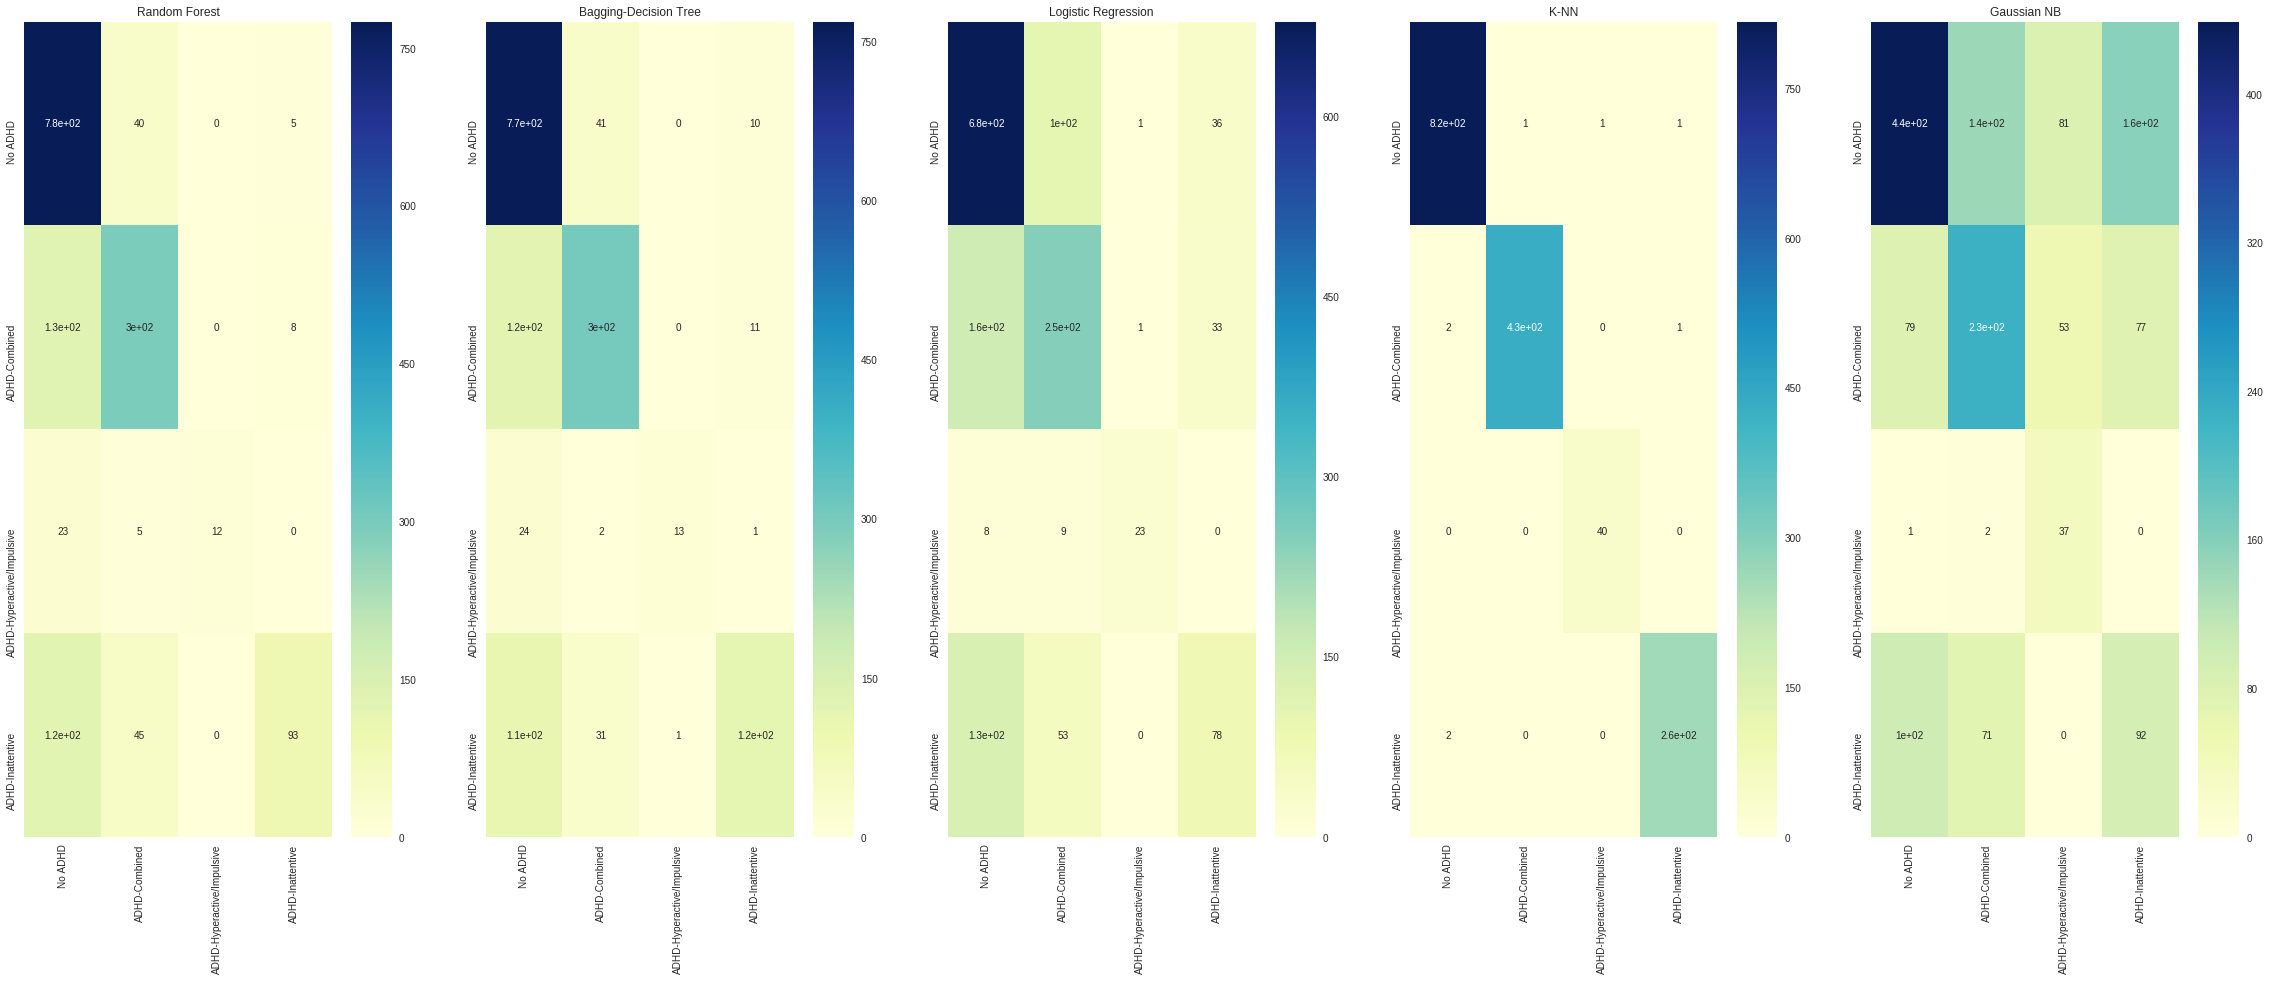

-------------------------------------
alff_raw_balanced


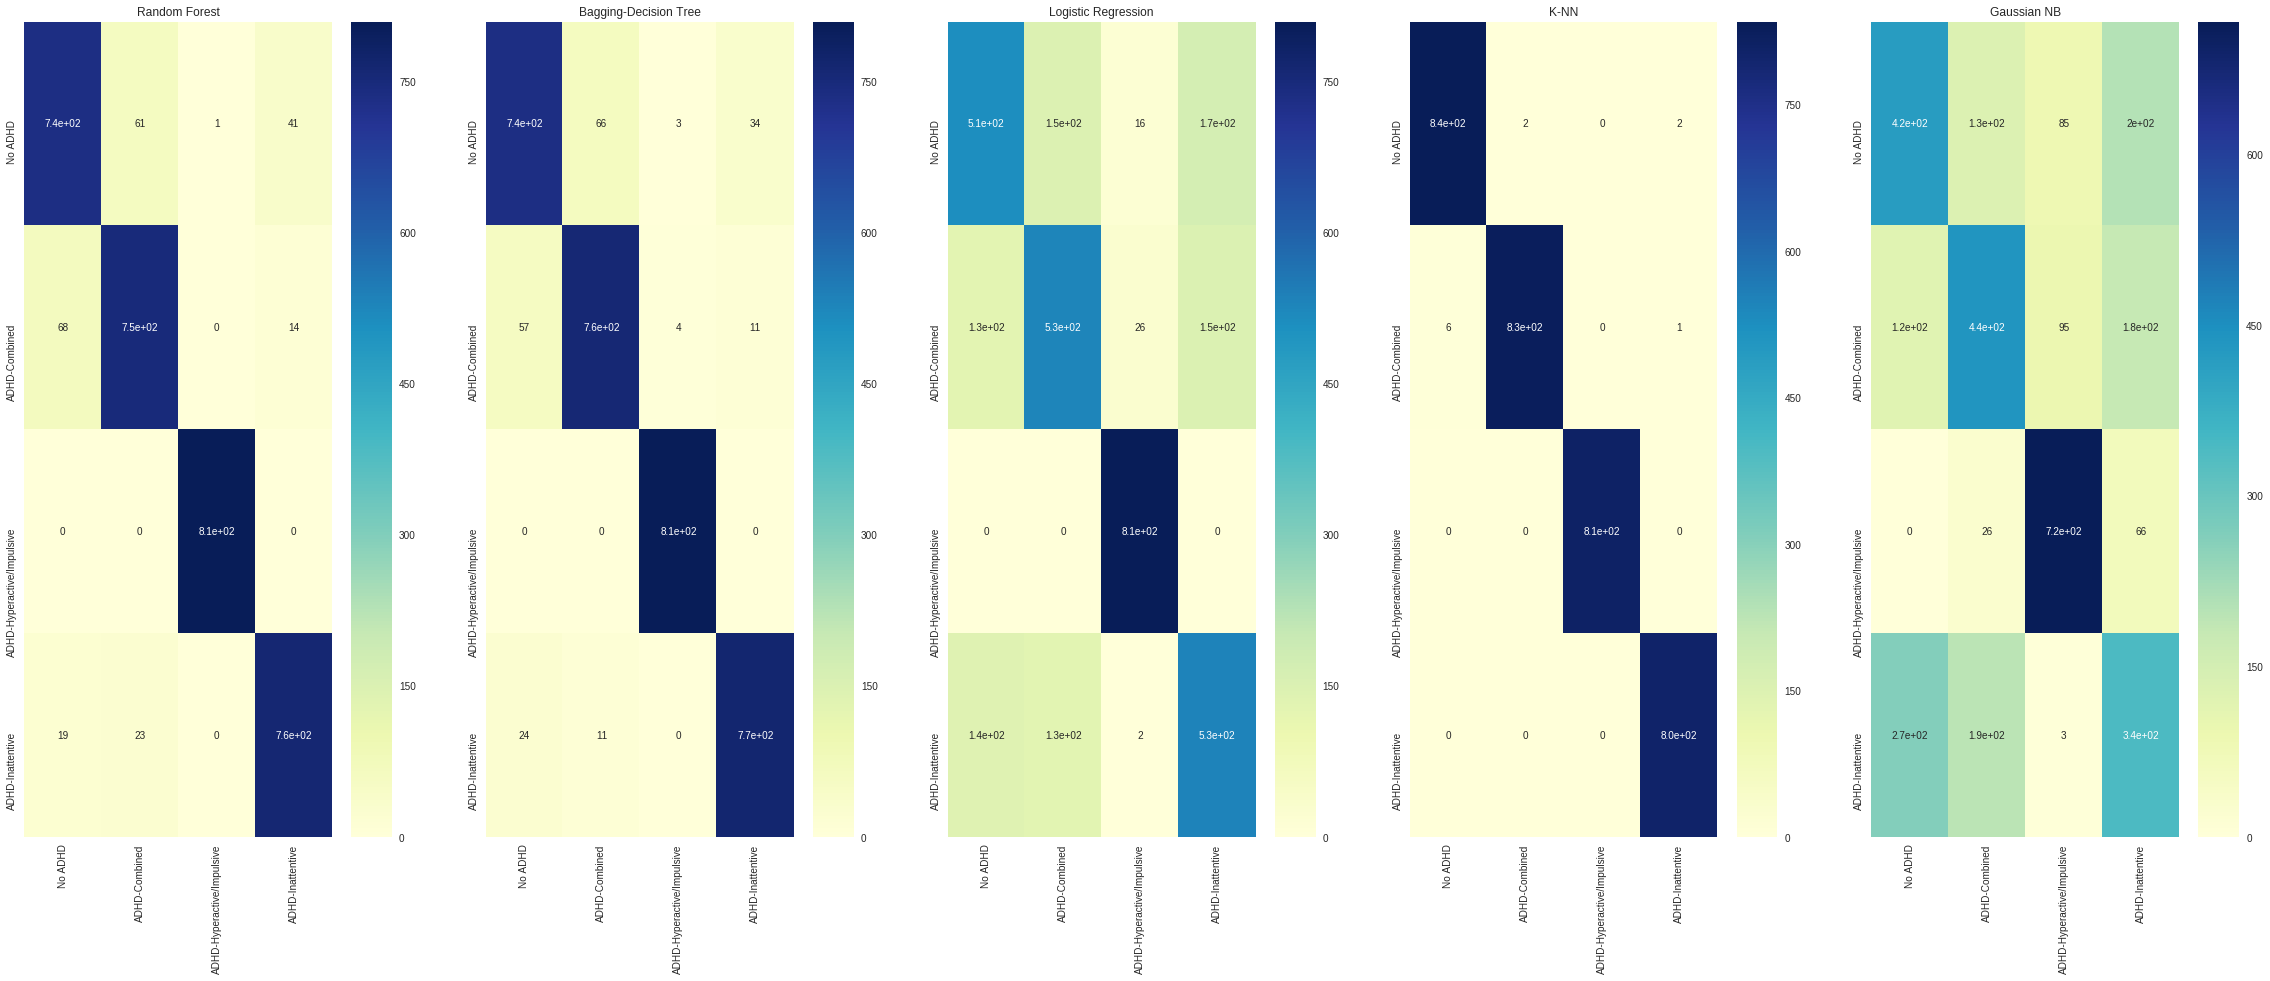

-------------------------------------
alff_raw_feat


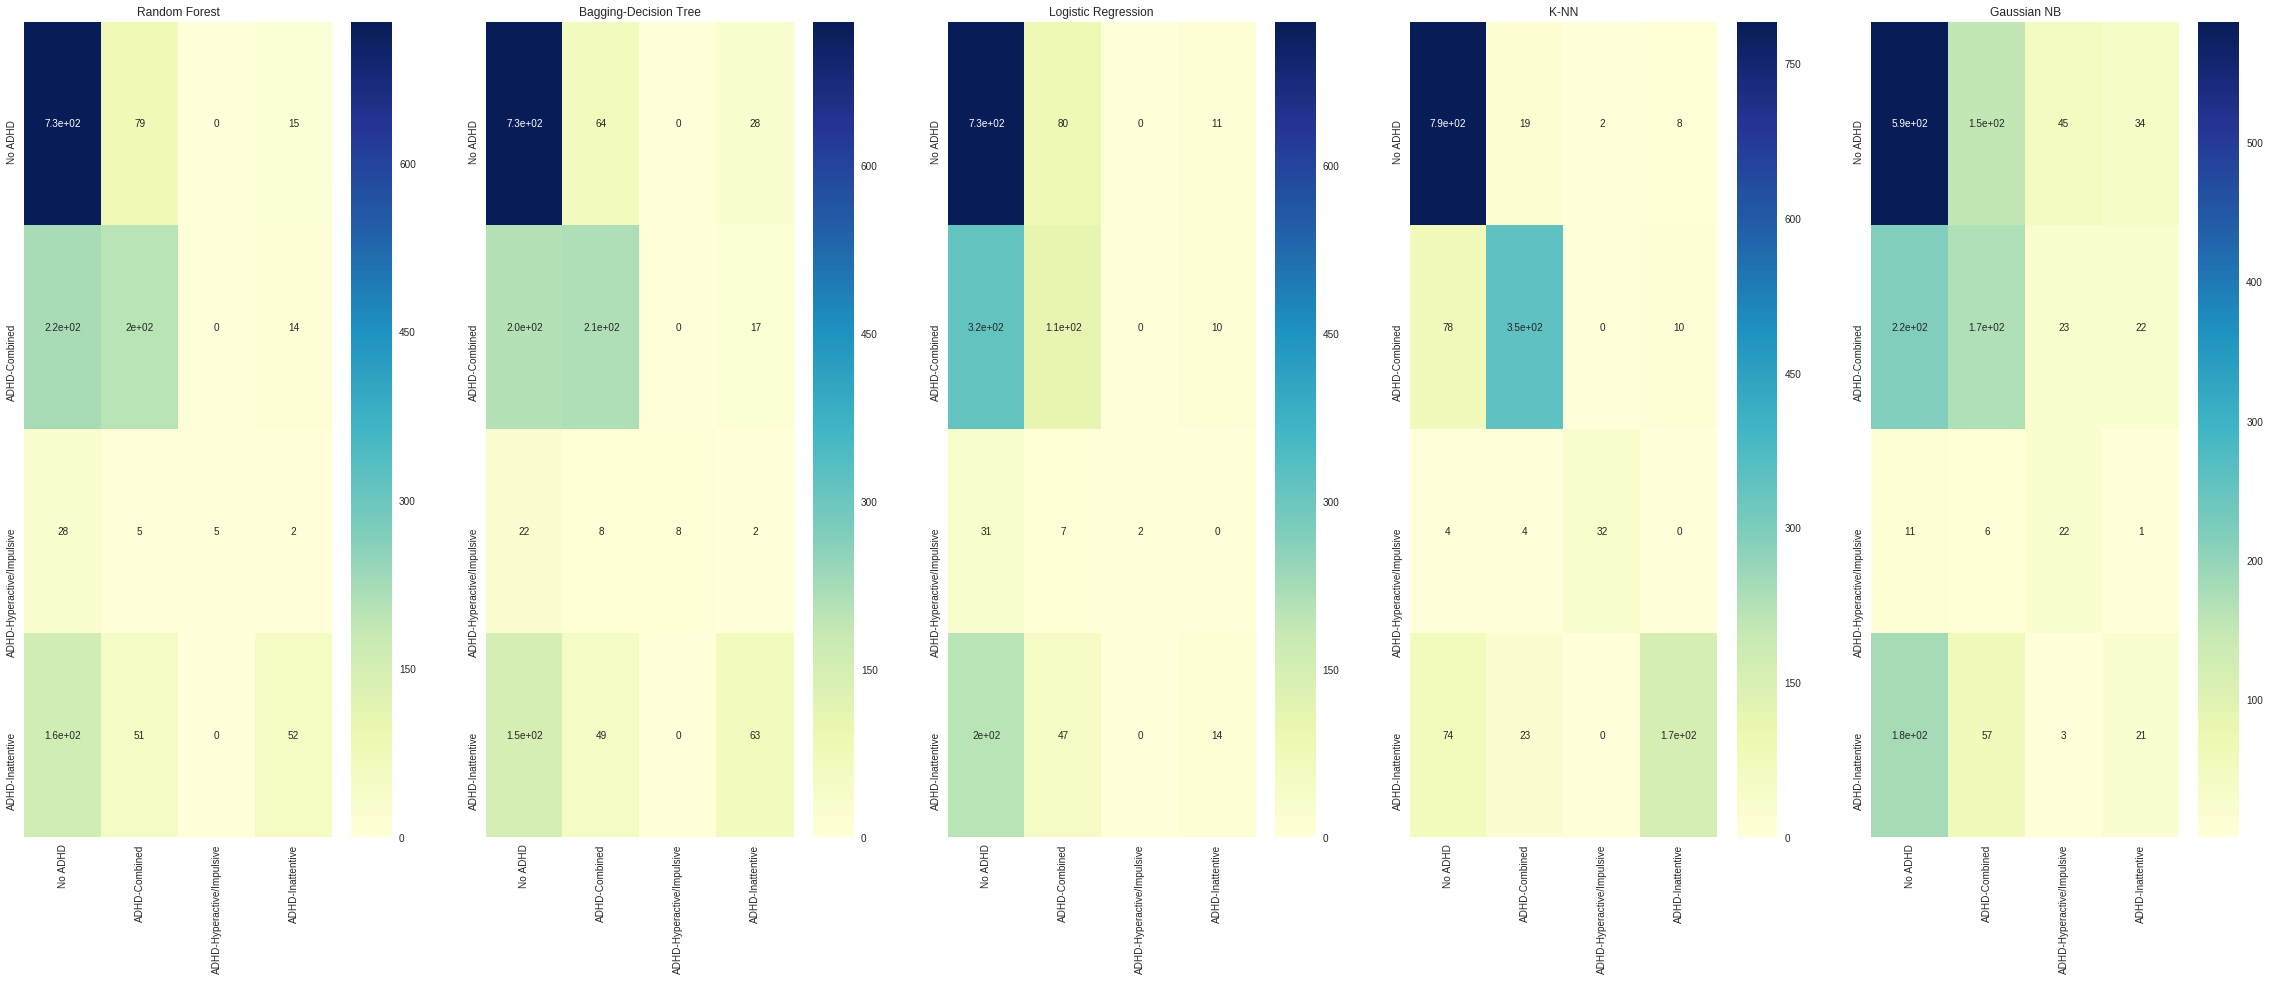

-------------------------------------
alff_raw_feat_balanced


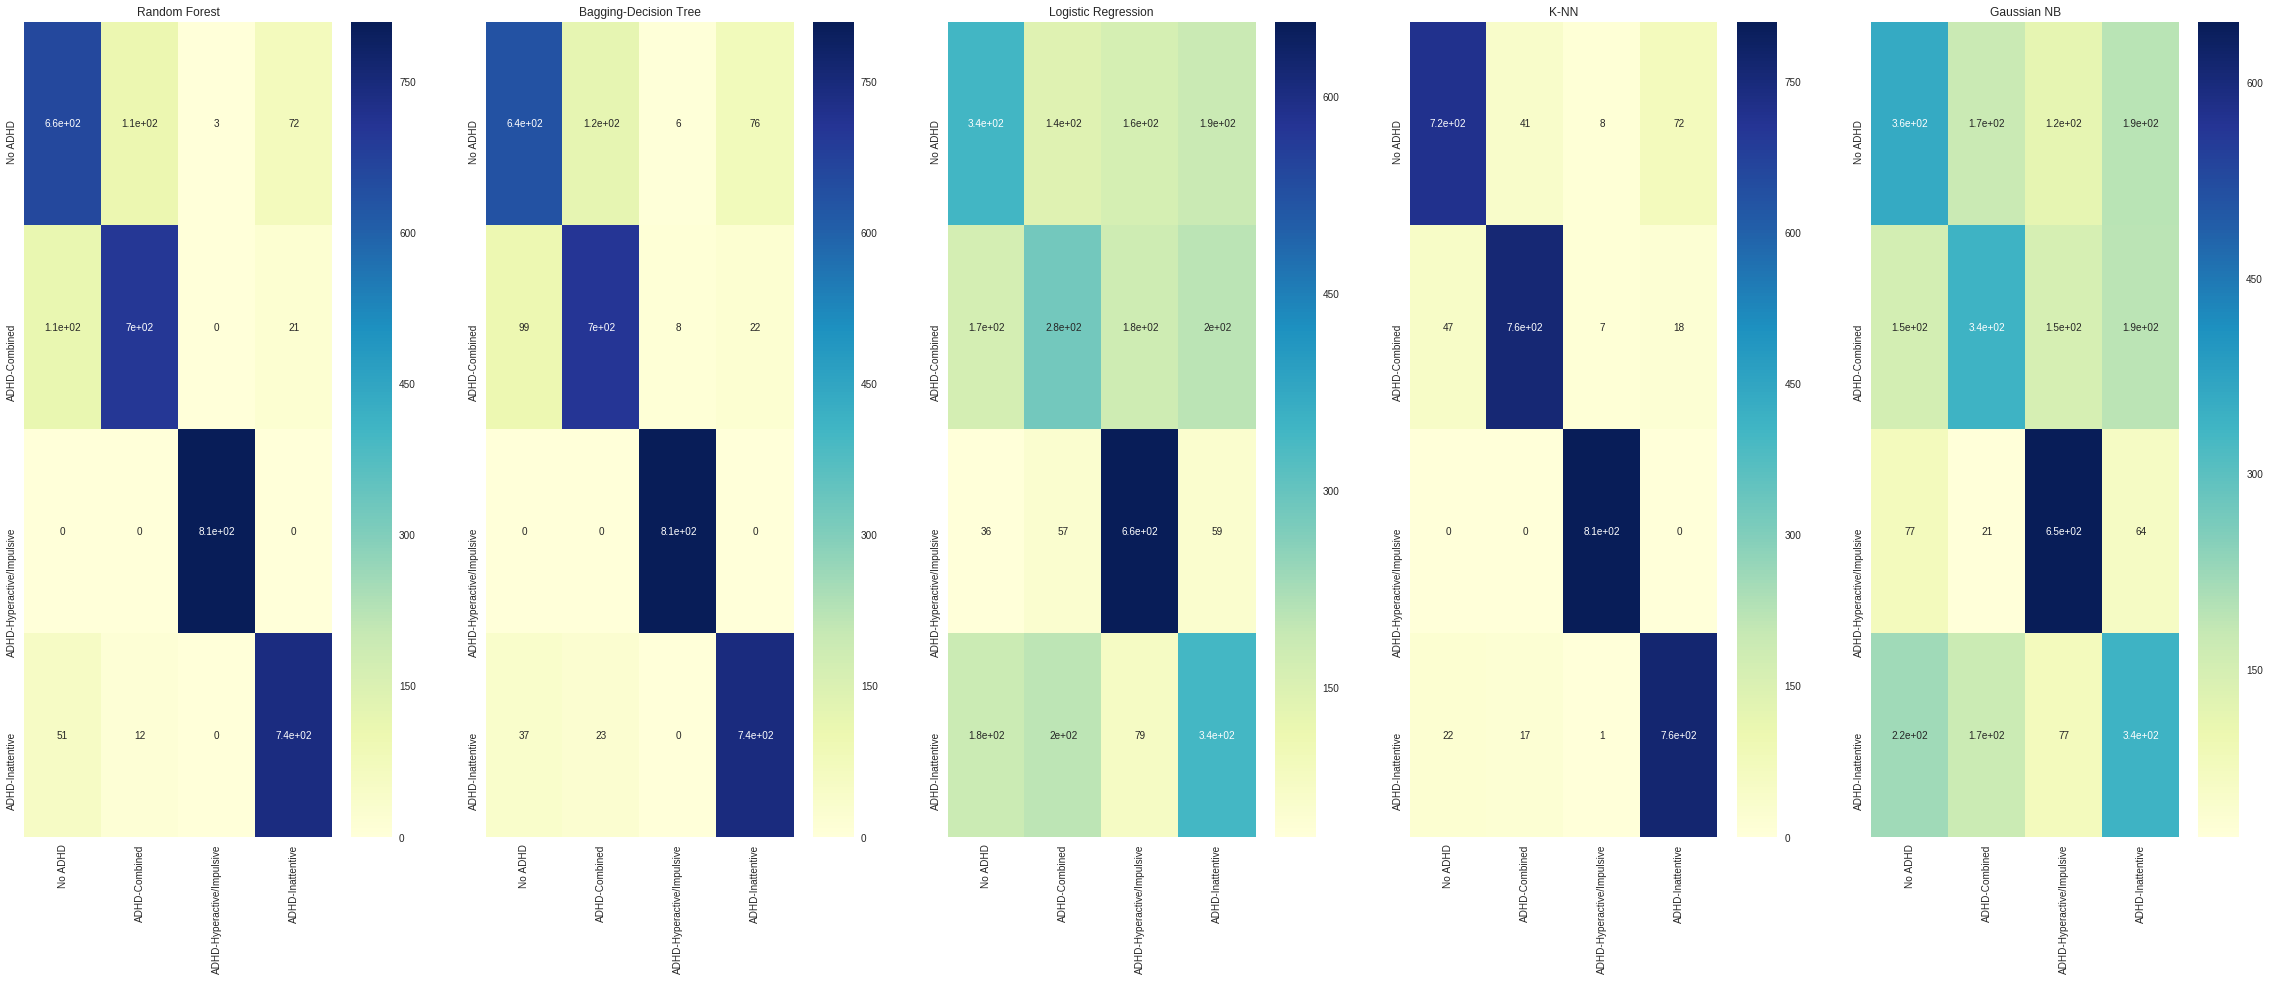

-------------------------------------
alff_bin


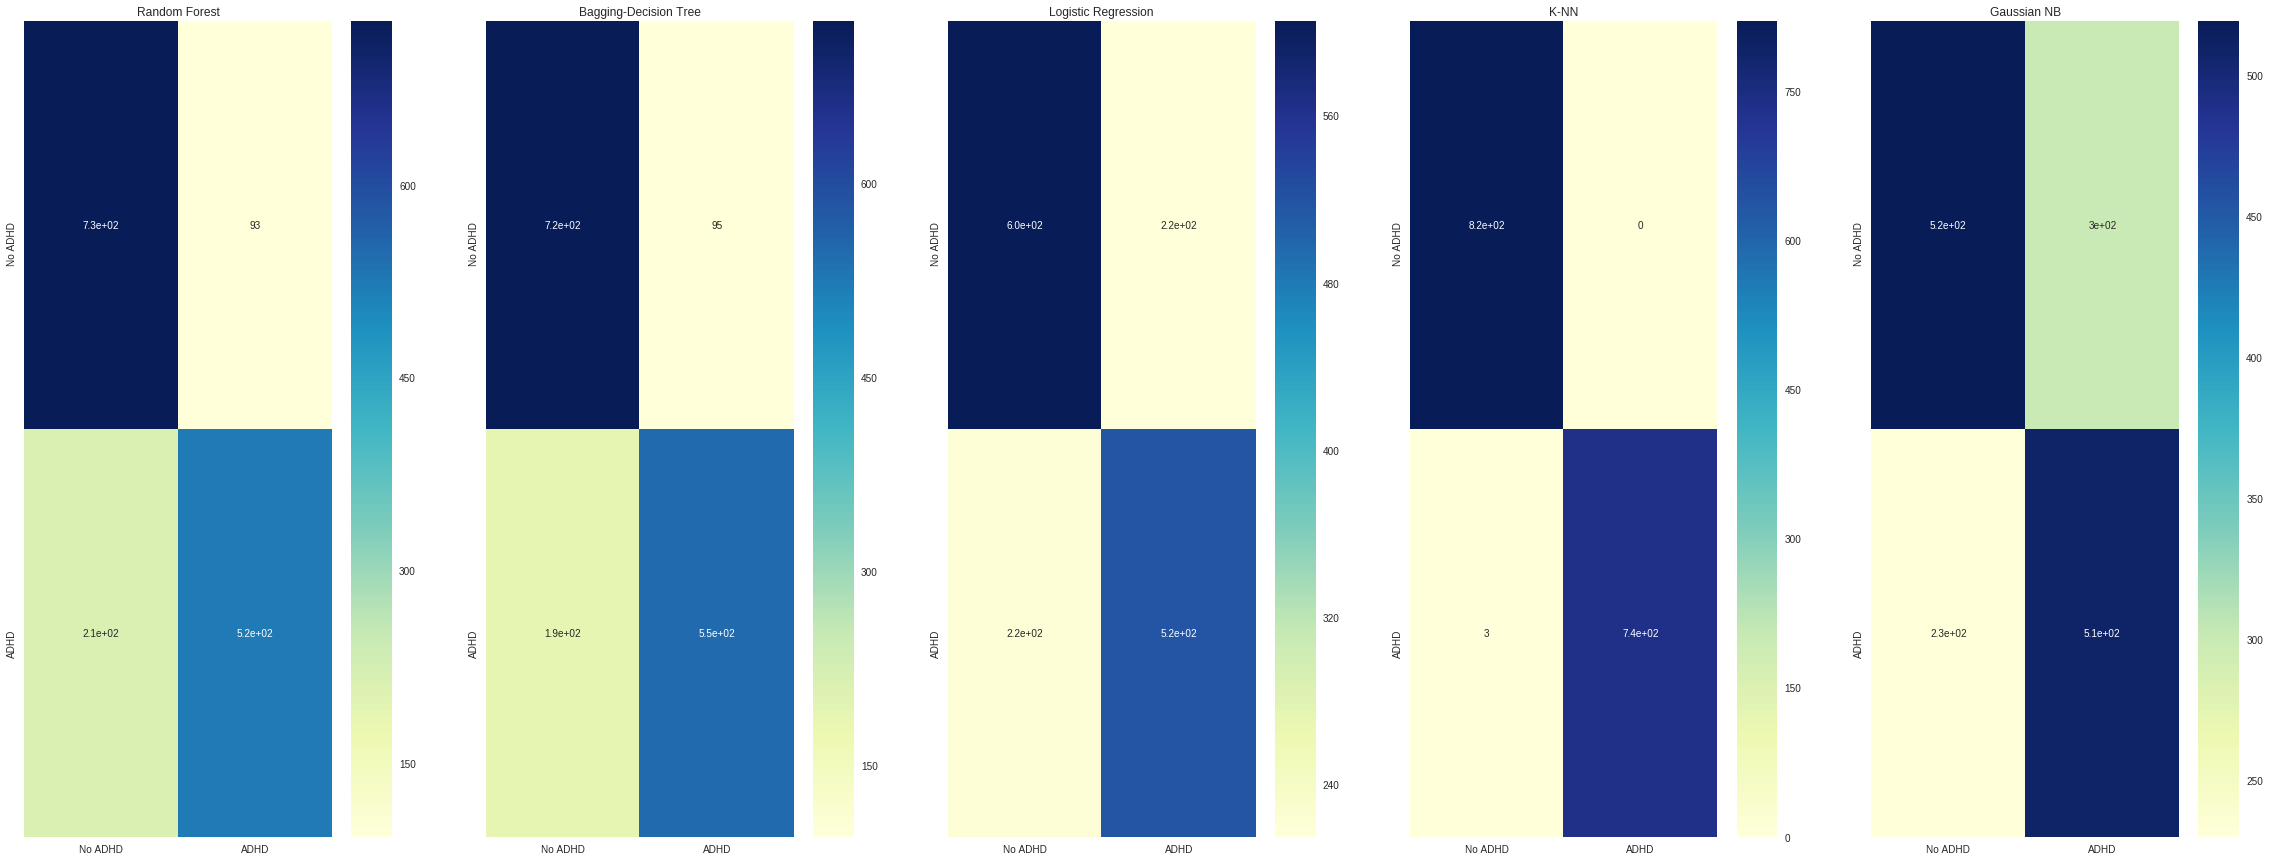

-------------------------------------
alff_bin_balanced


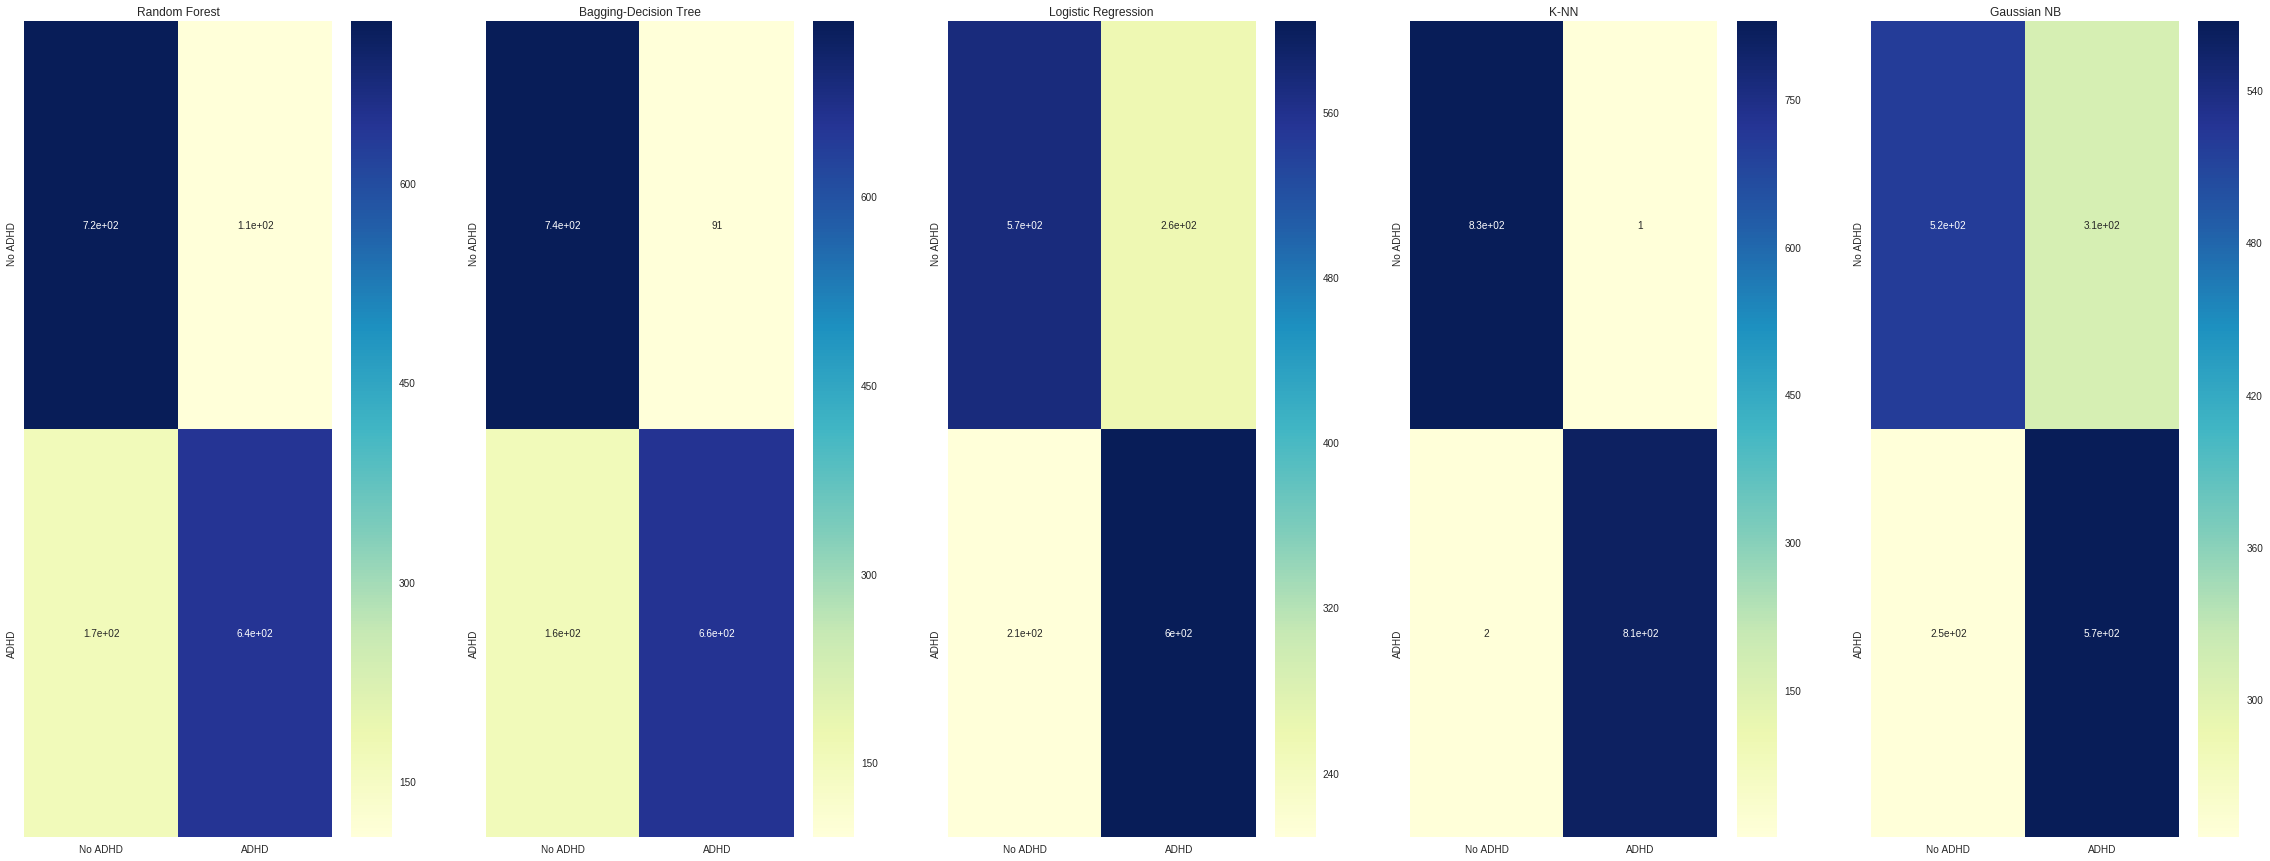

-------------------------------------
alff_bin_feat


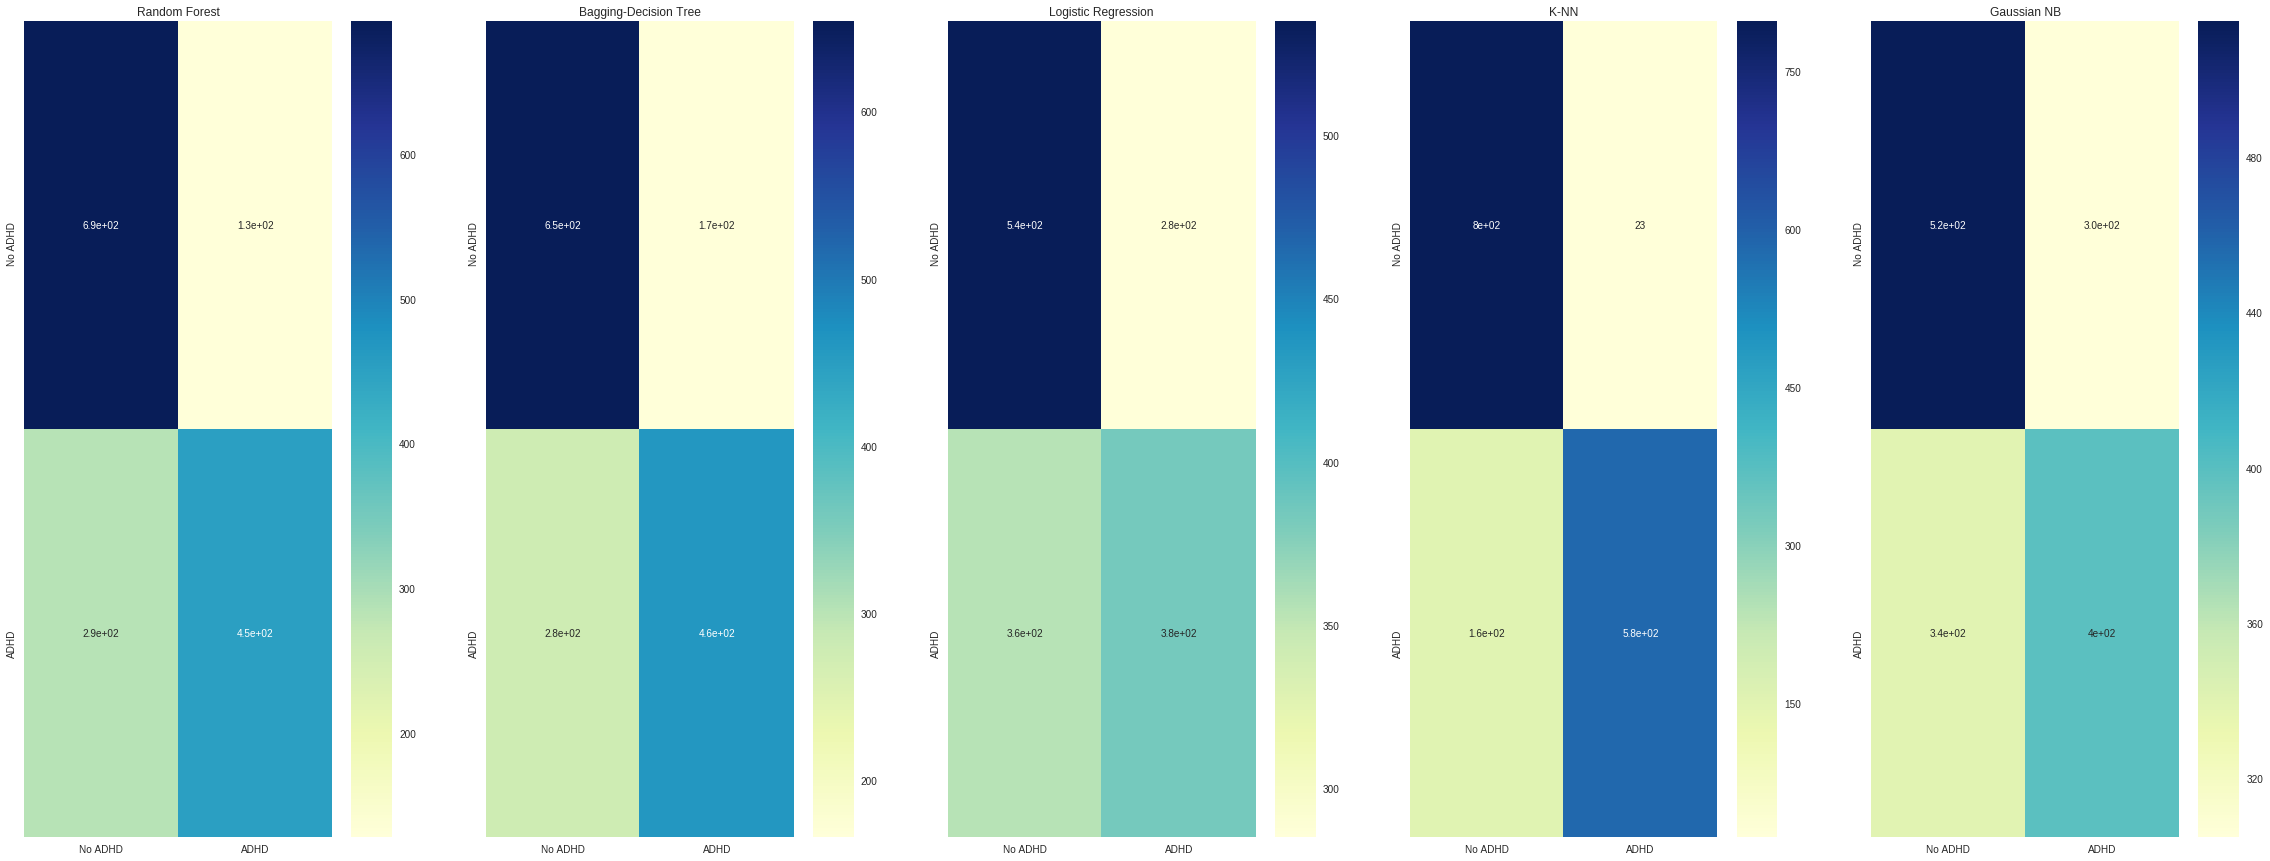

-------------------------------------
alff_bin_feat_balanced


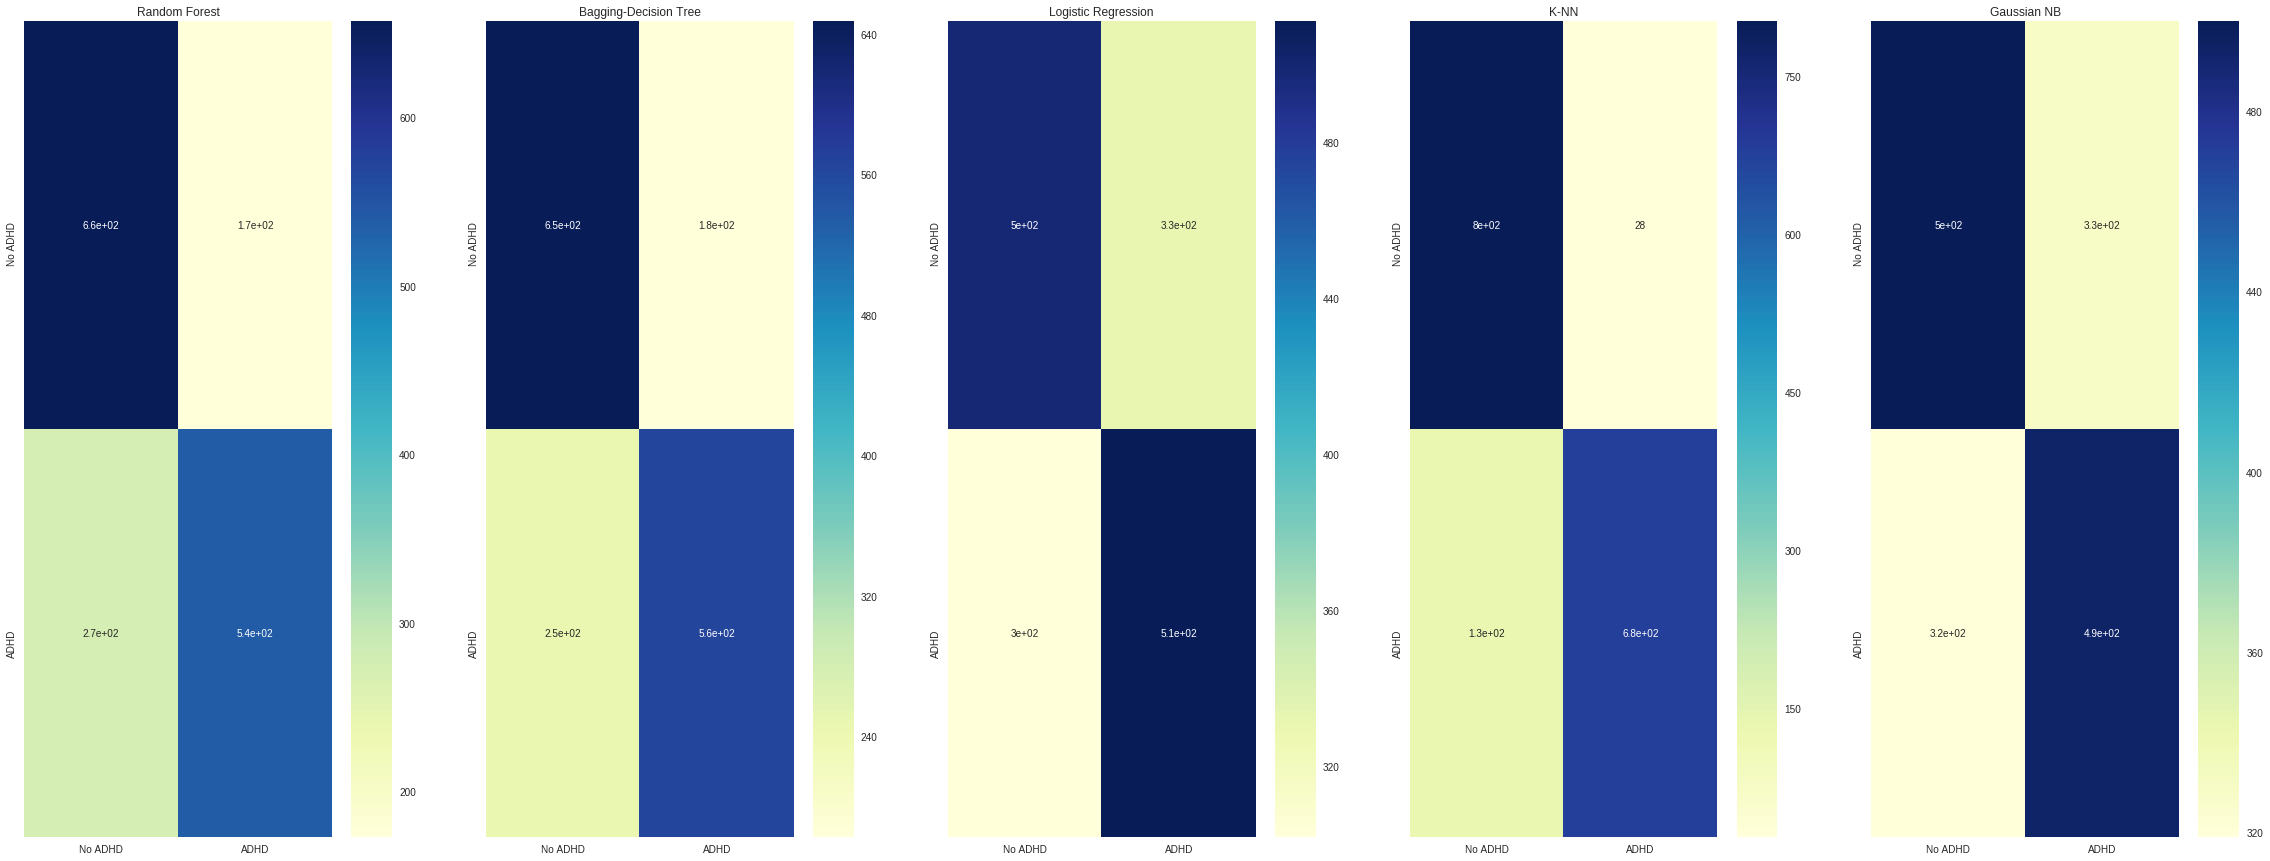

-------------------------------------
alff_phenotypic_raw


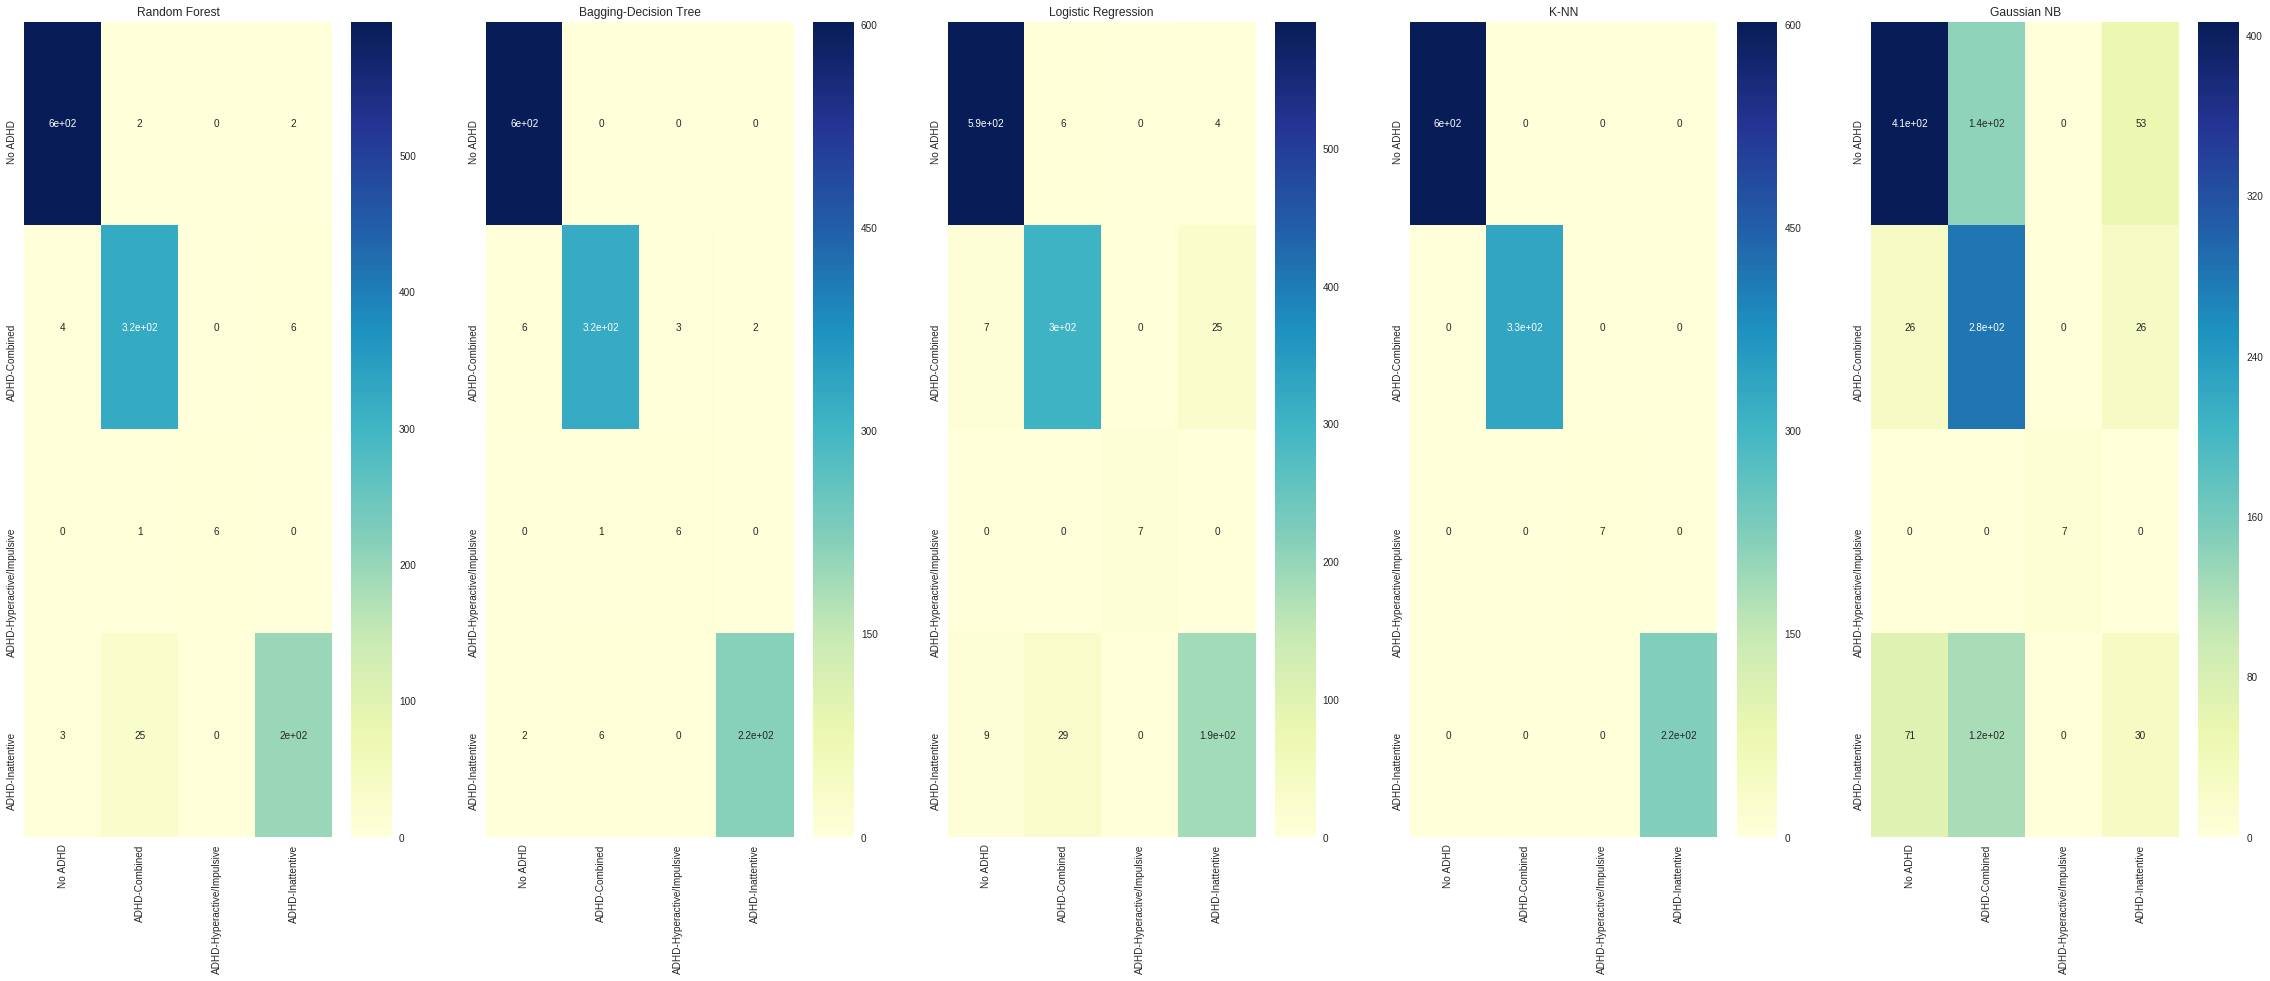

-------------------------------------
alff_phenotypic_raw_balanced


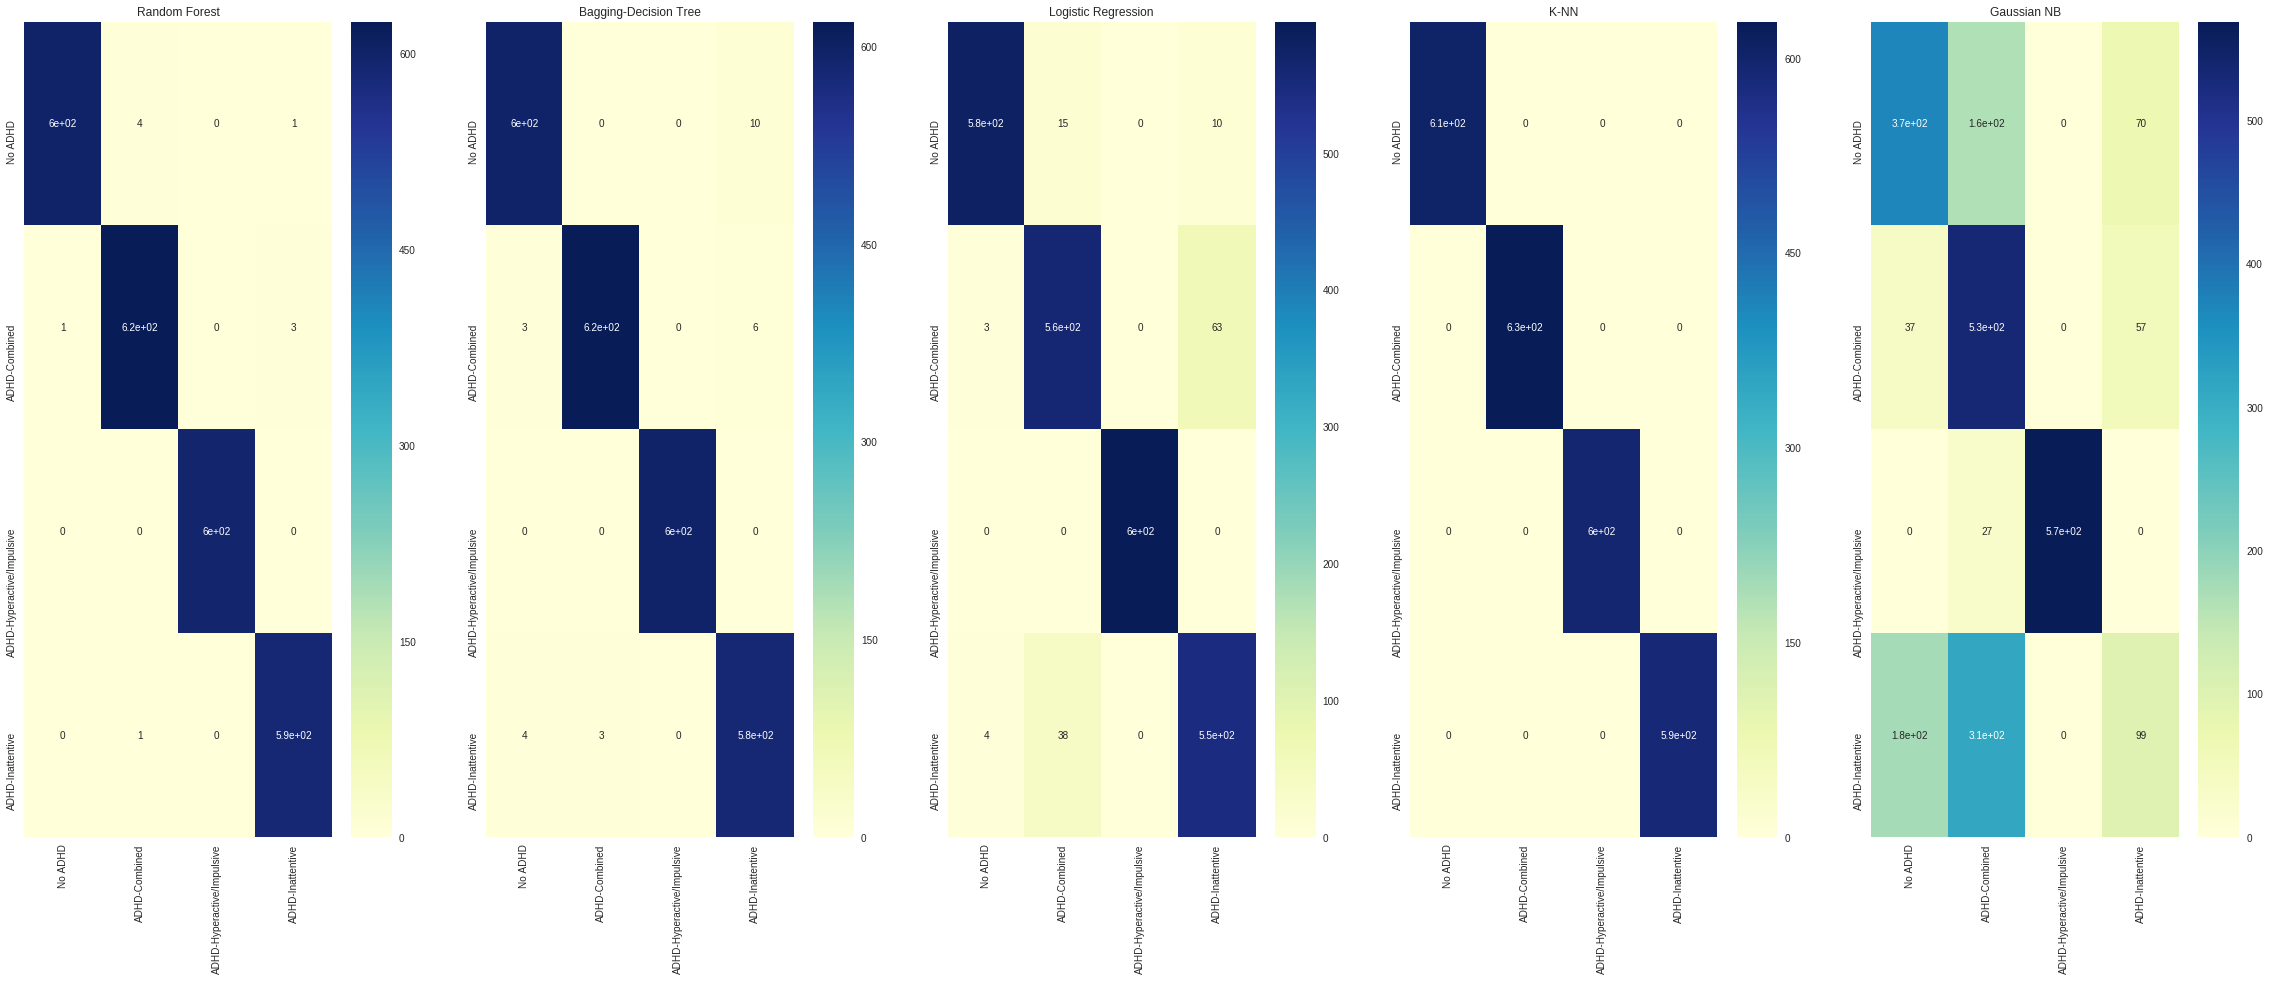

-------------------------------------
alff_phenotypic_raw_feat


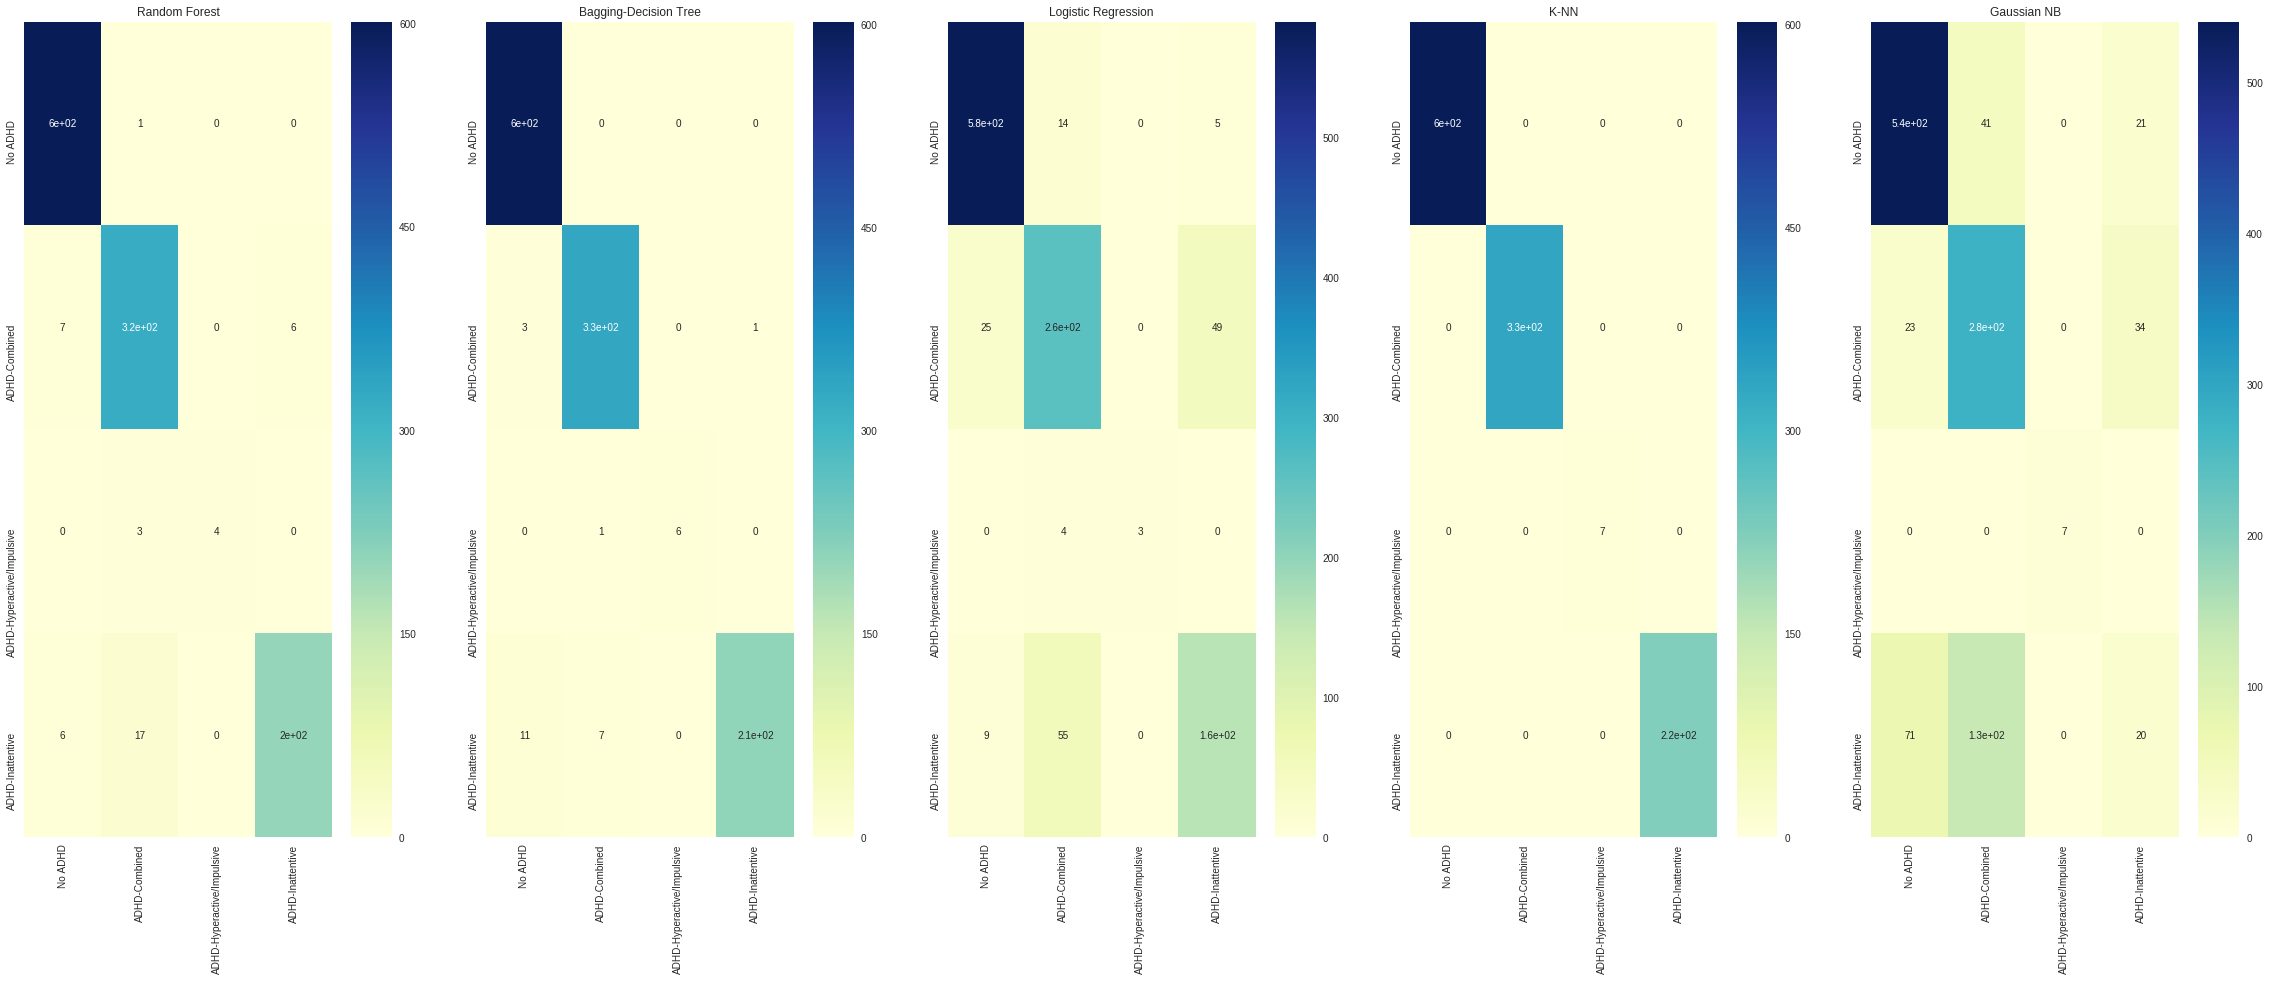

-------------------------------------
alff_phenotypic_raw_feat_balanced


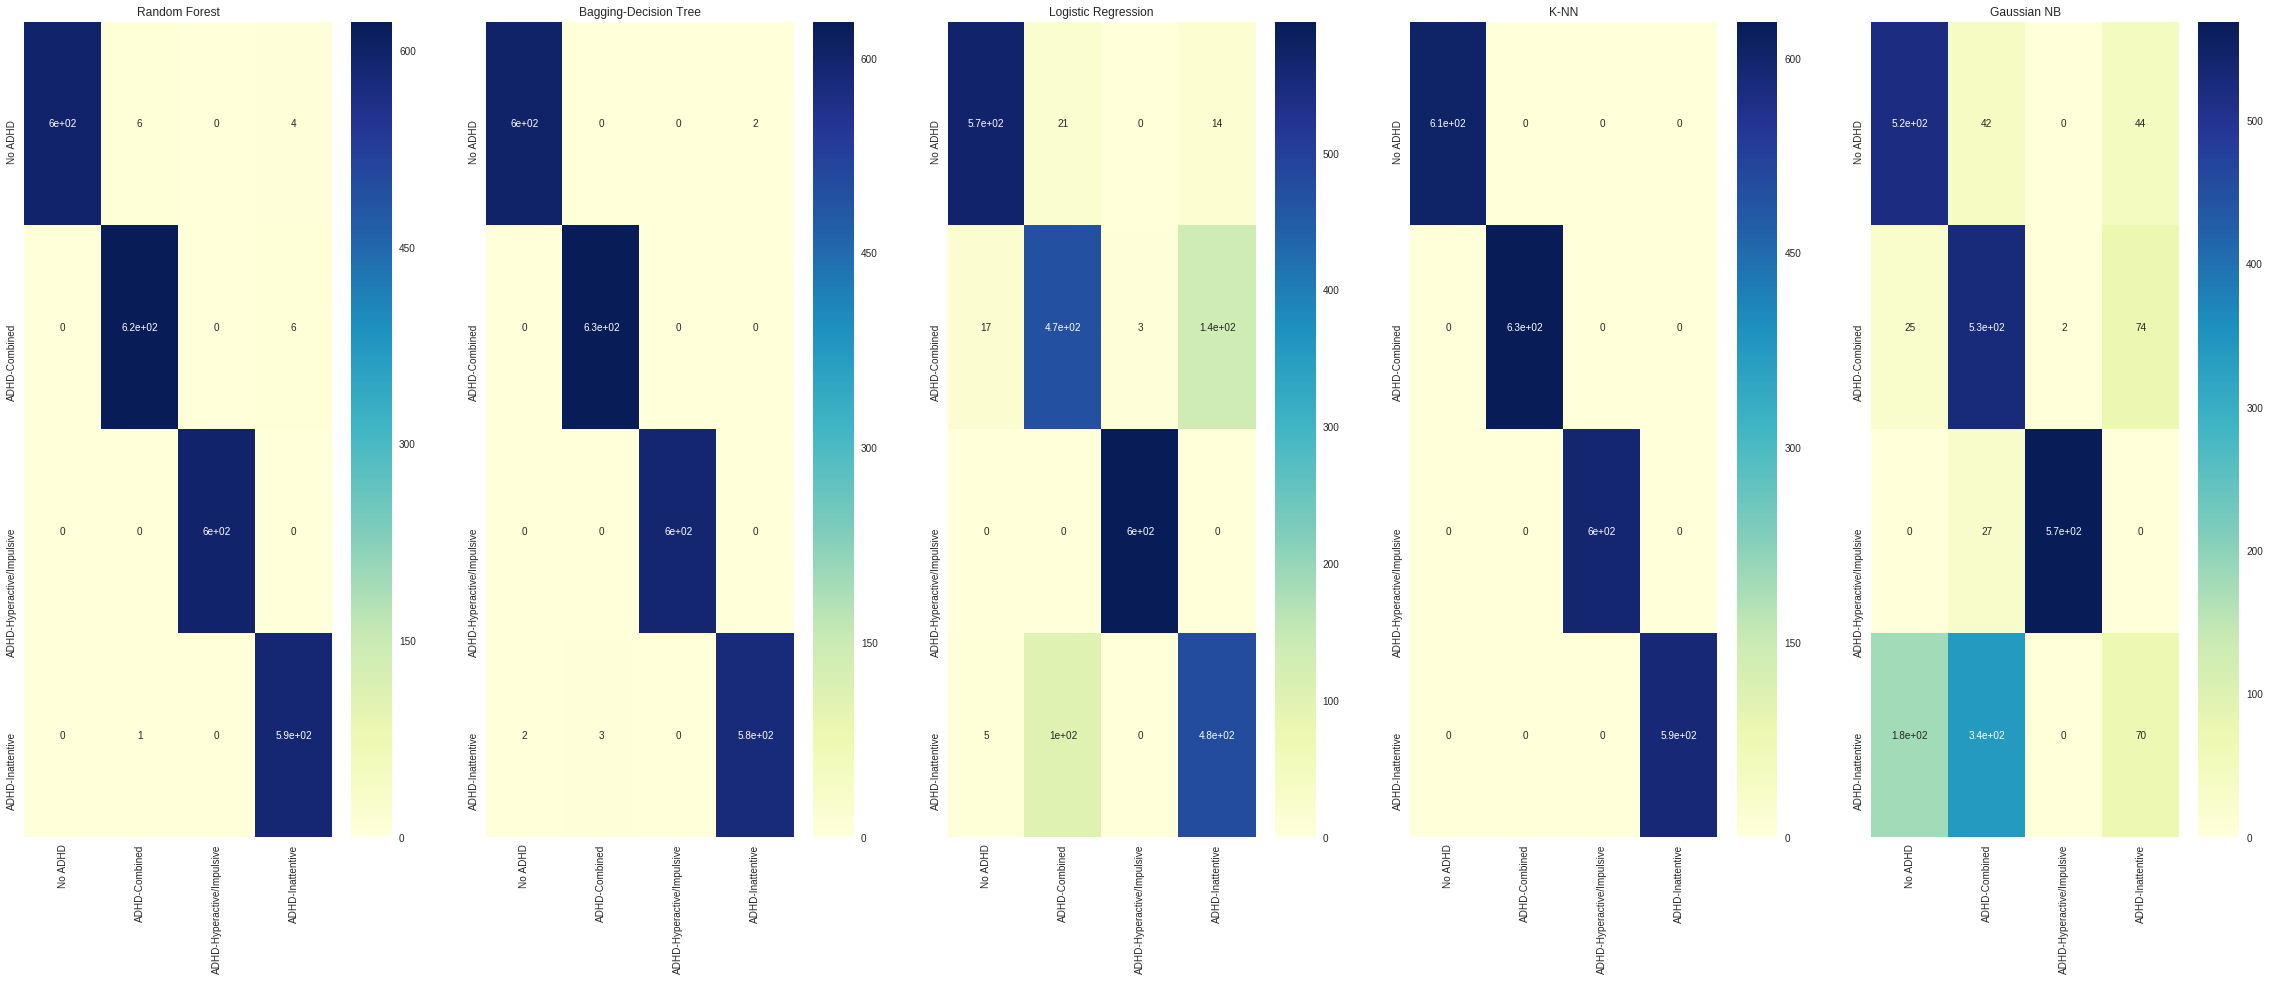

-------------------------------------
alff_phenotypic_bin


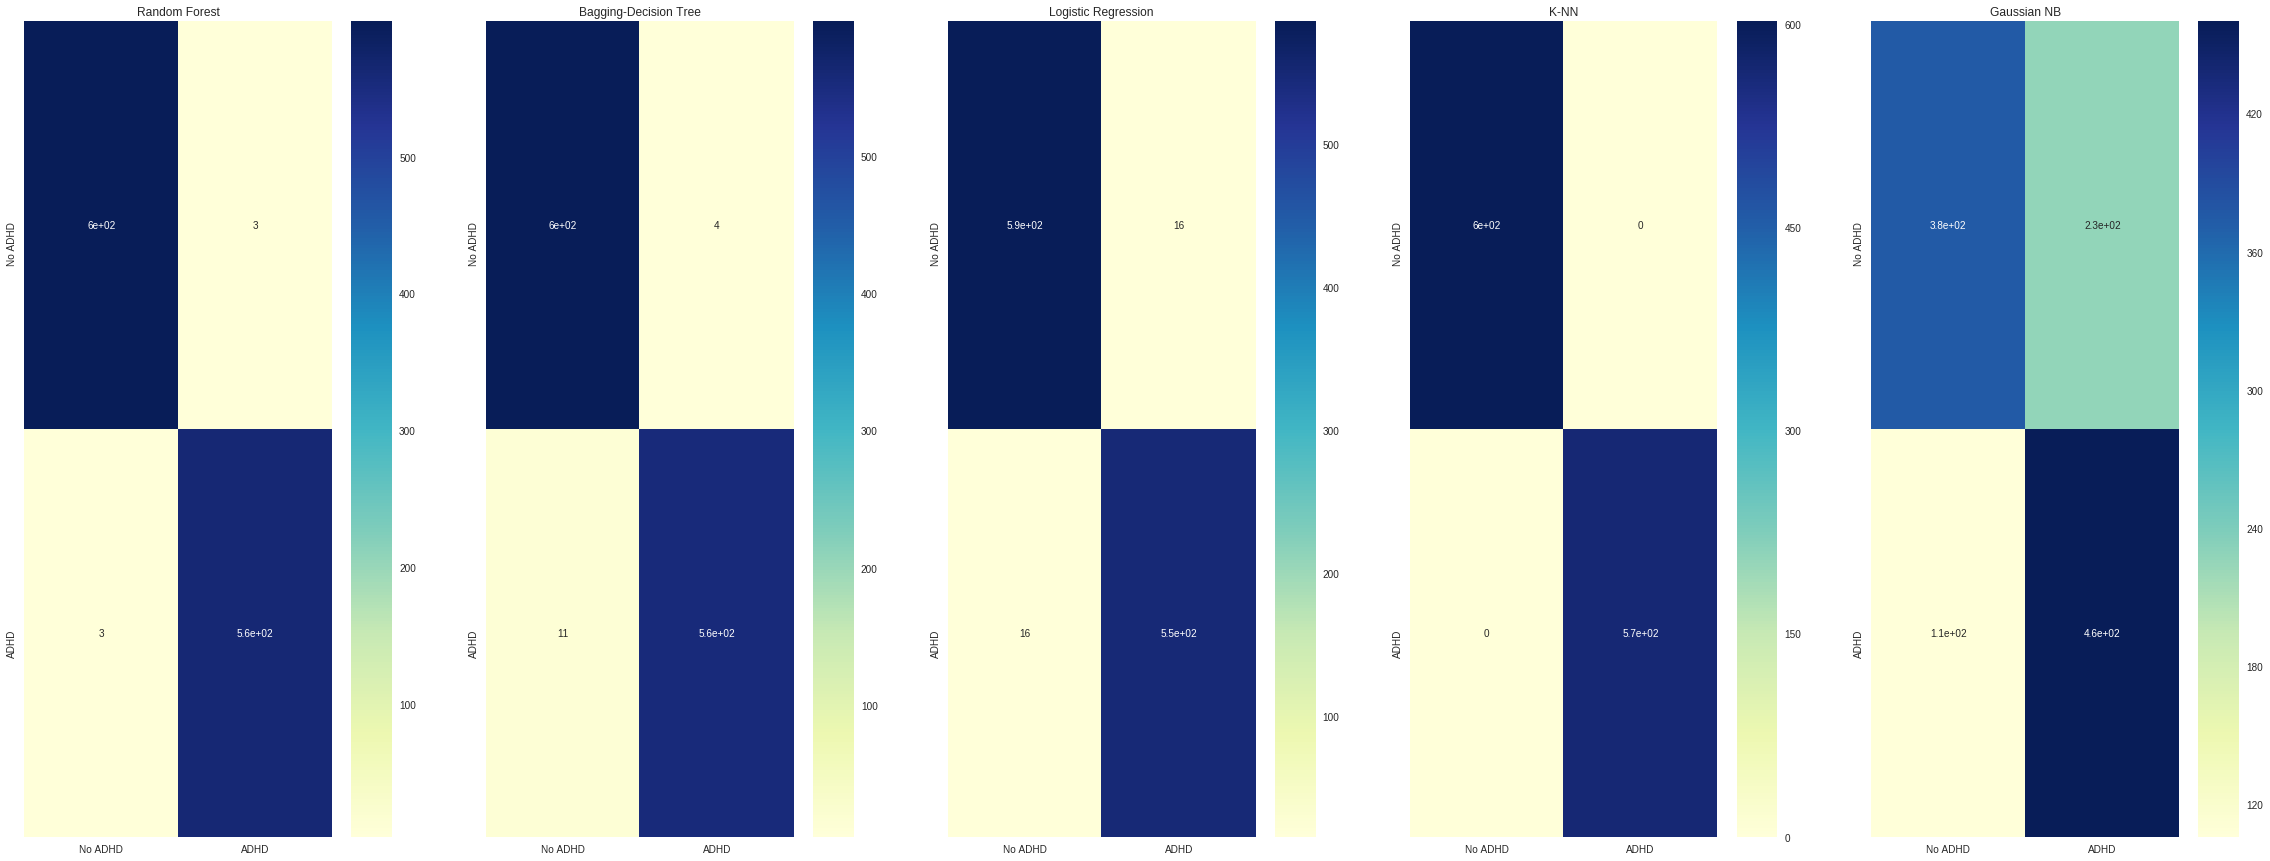

-------------------------------------
alff_phenotypic_bin_balanced


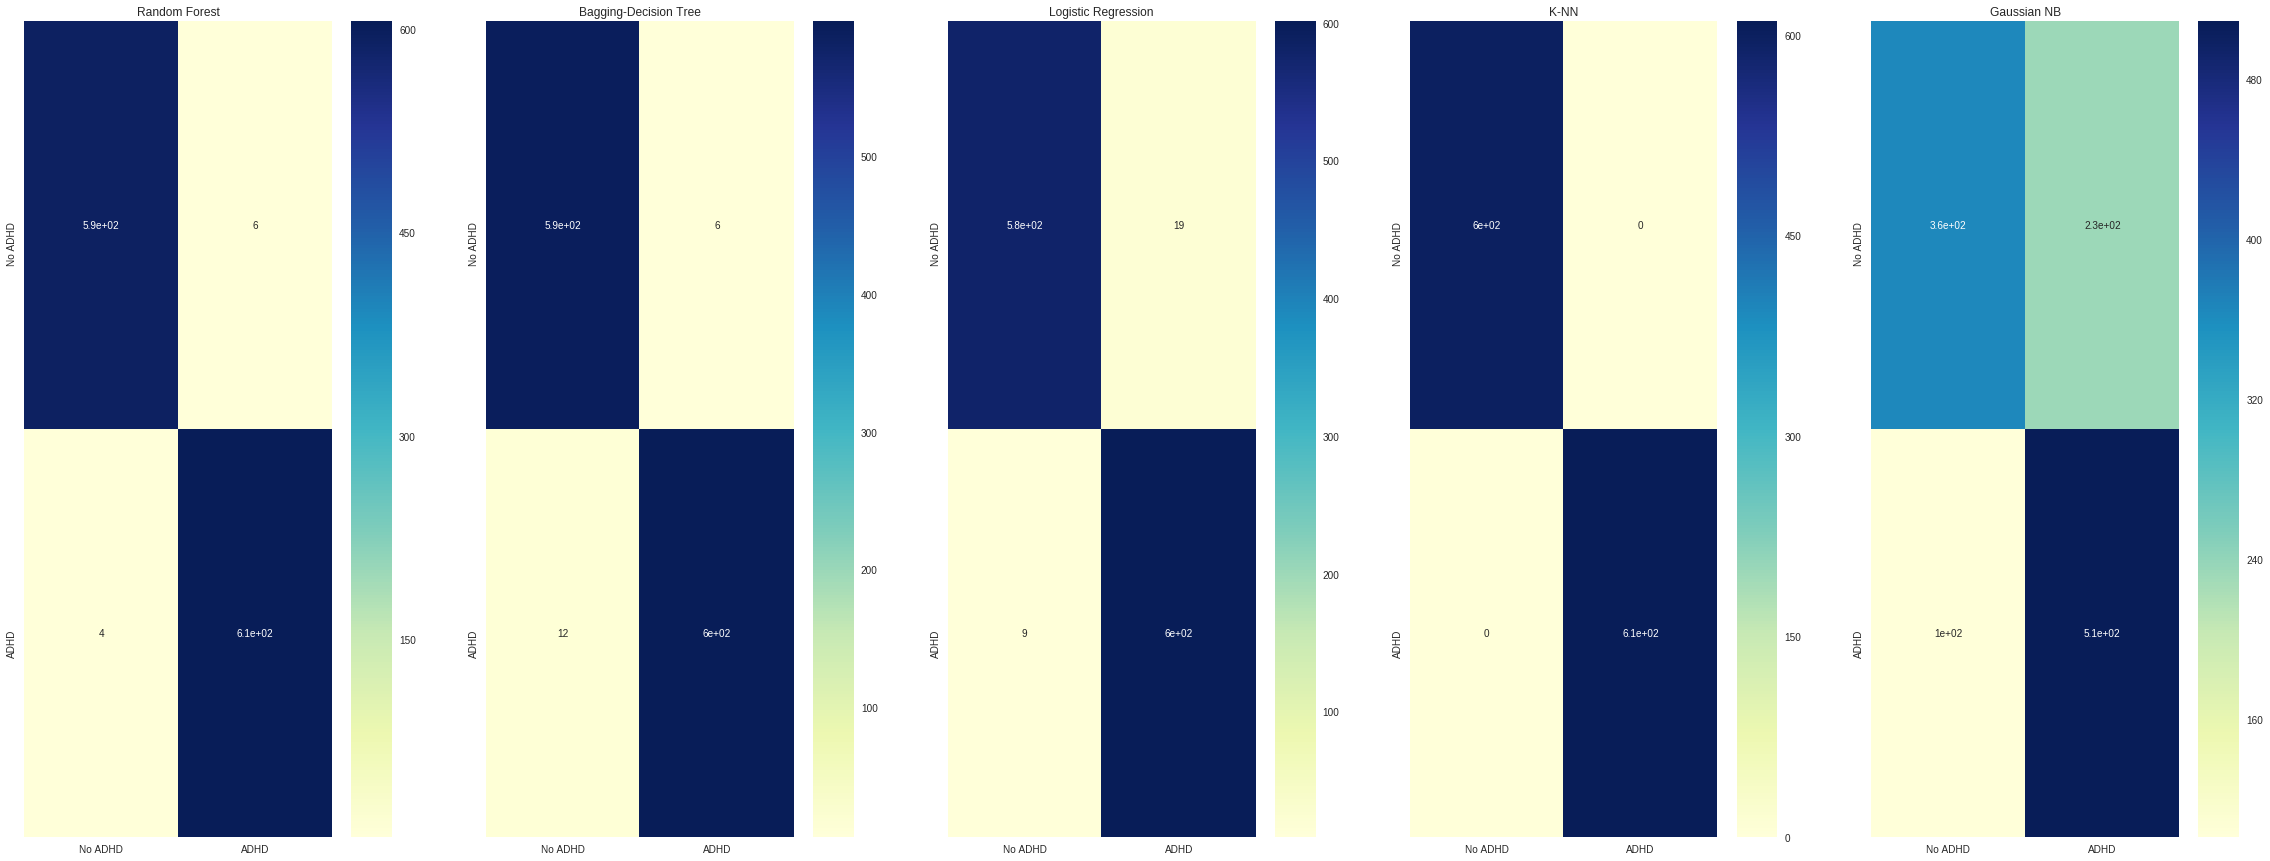

-------------------------------------
alff_phenotypic_bin_feat


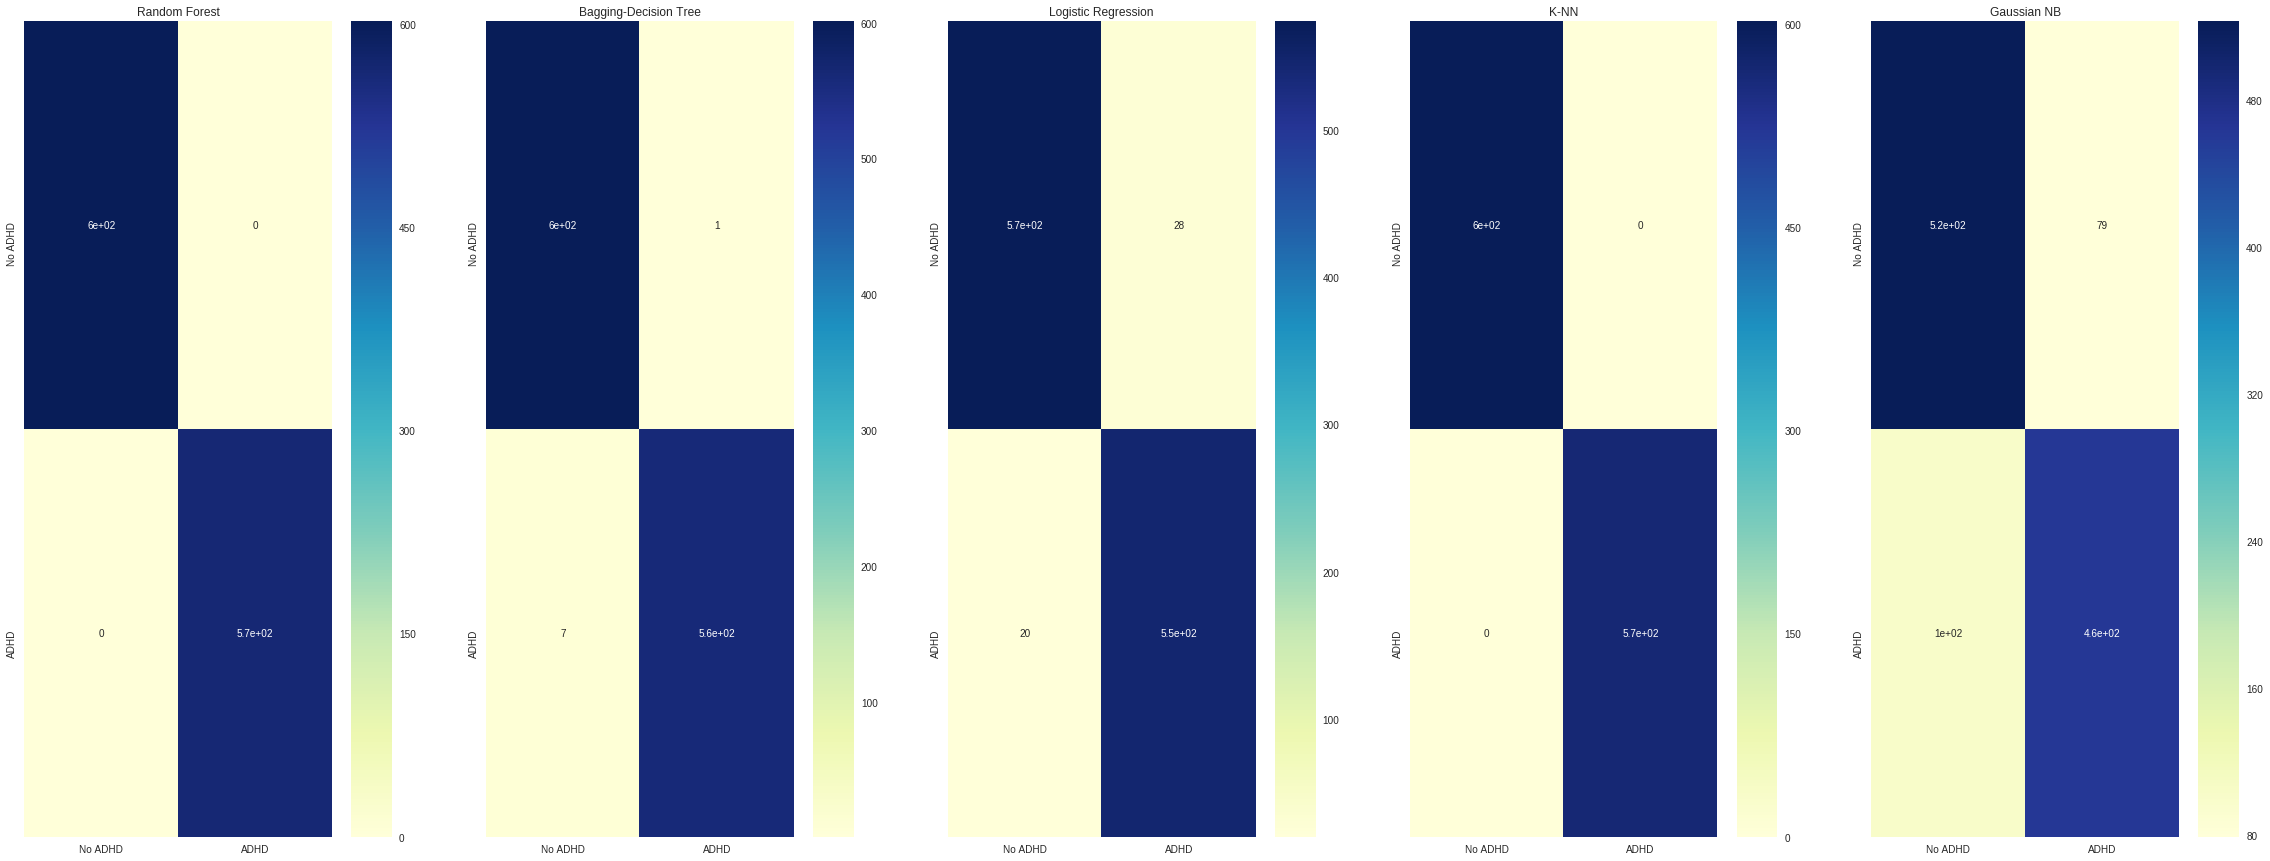

-------------------------------------
alff_phenotypic_bin_feat_balanced


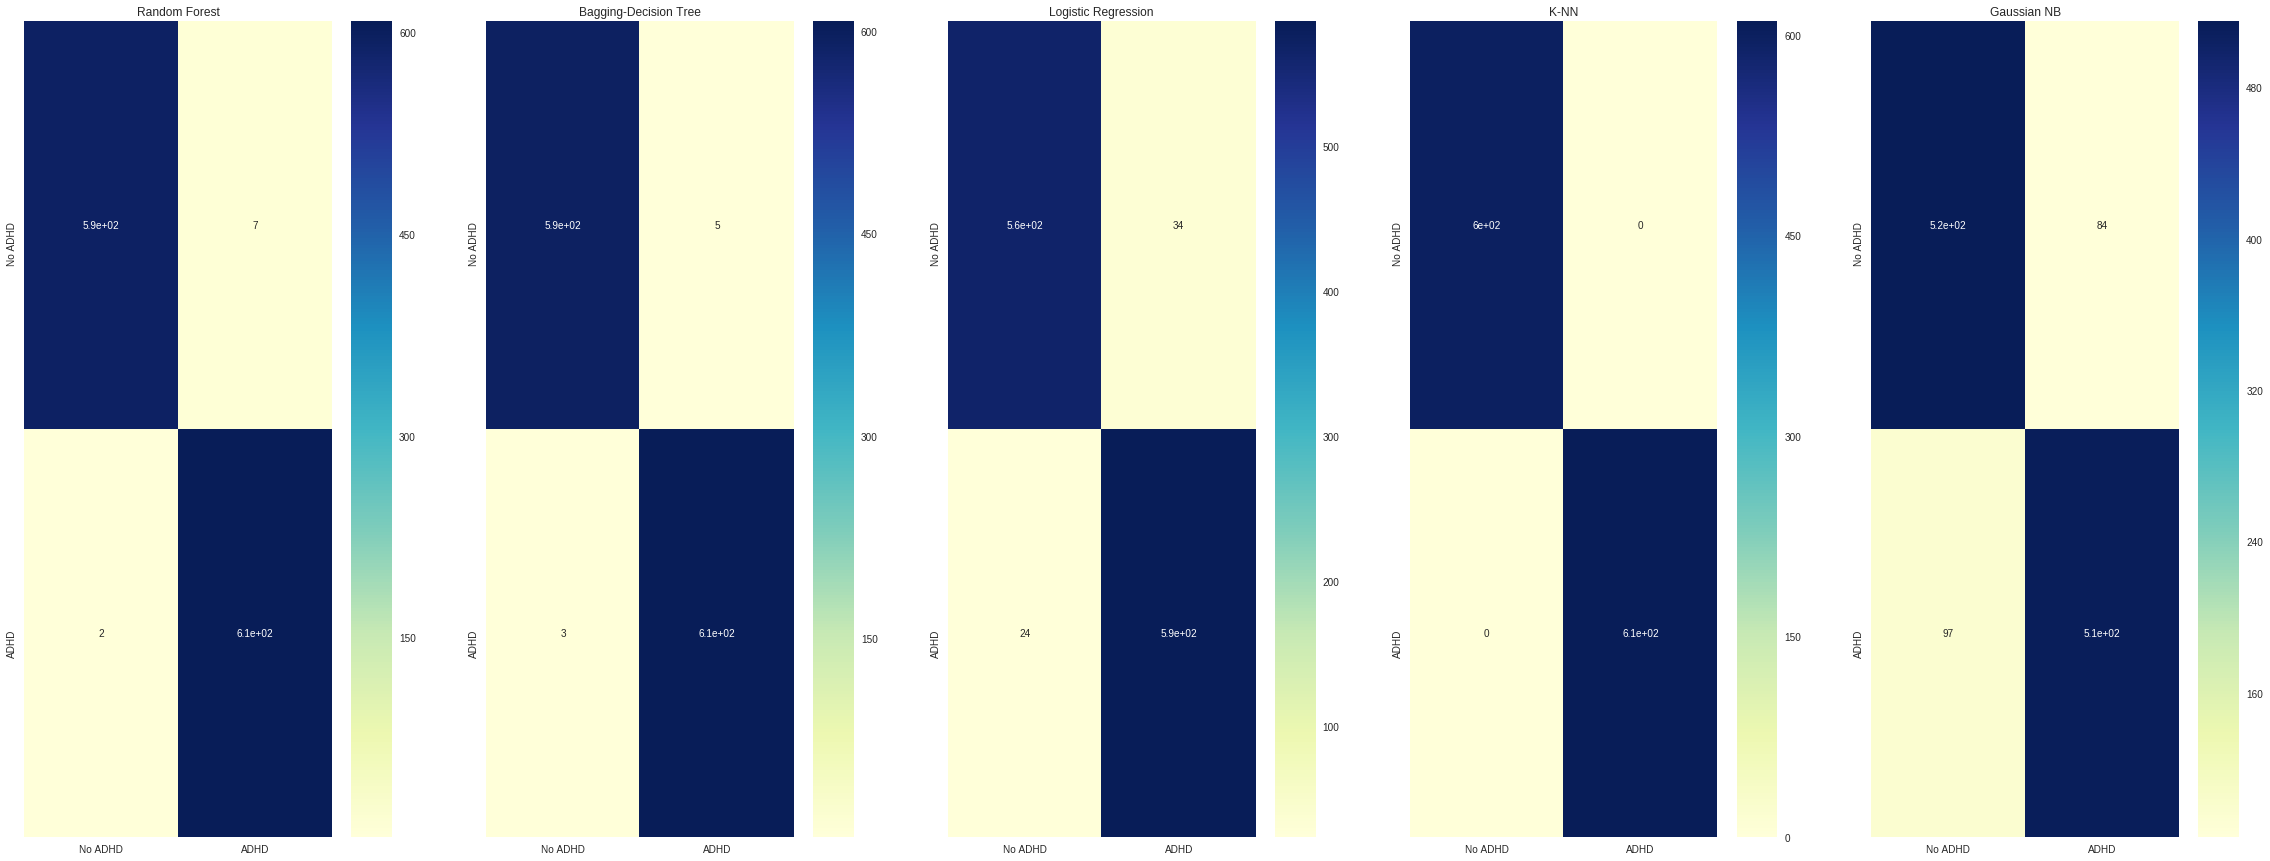

-------------------------------------
phenotypic_raw


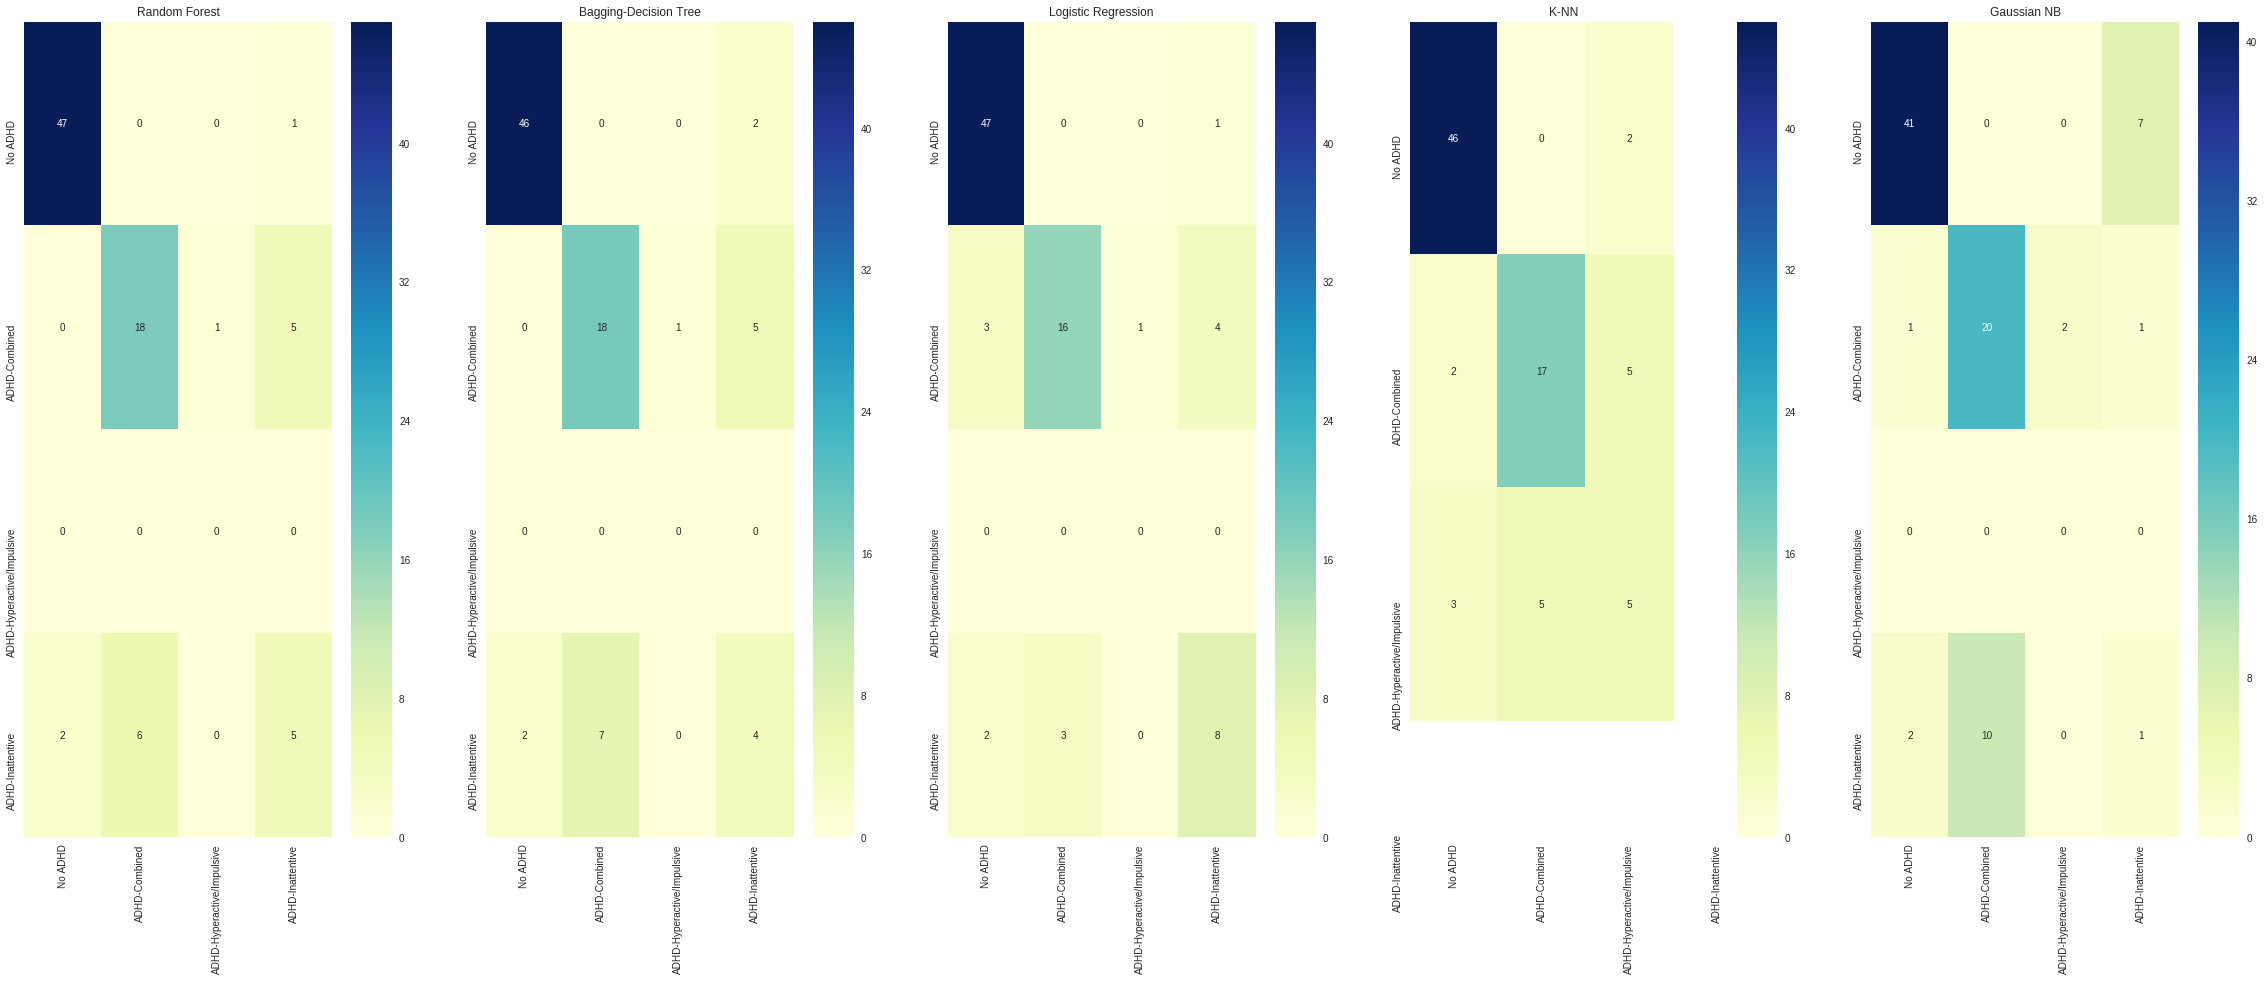

-------------------------------------
phenotypic_raw_balanced


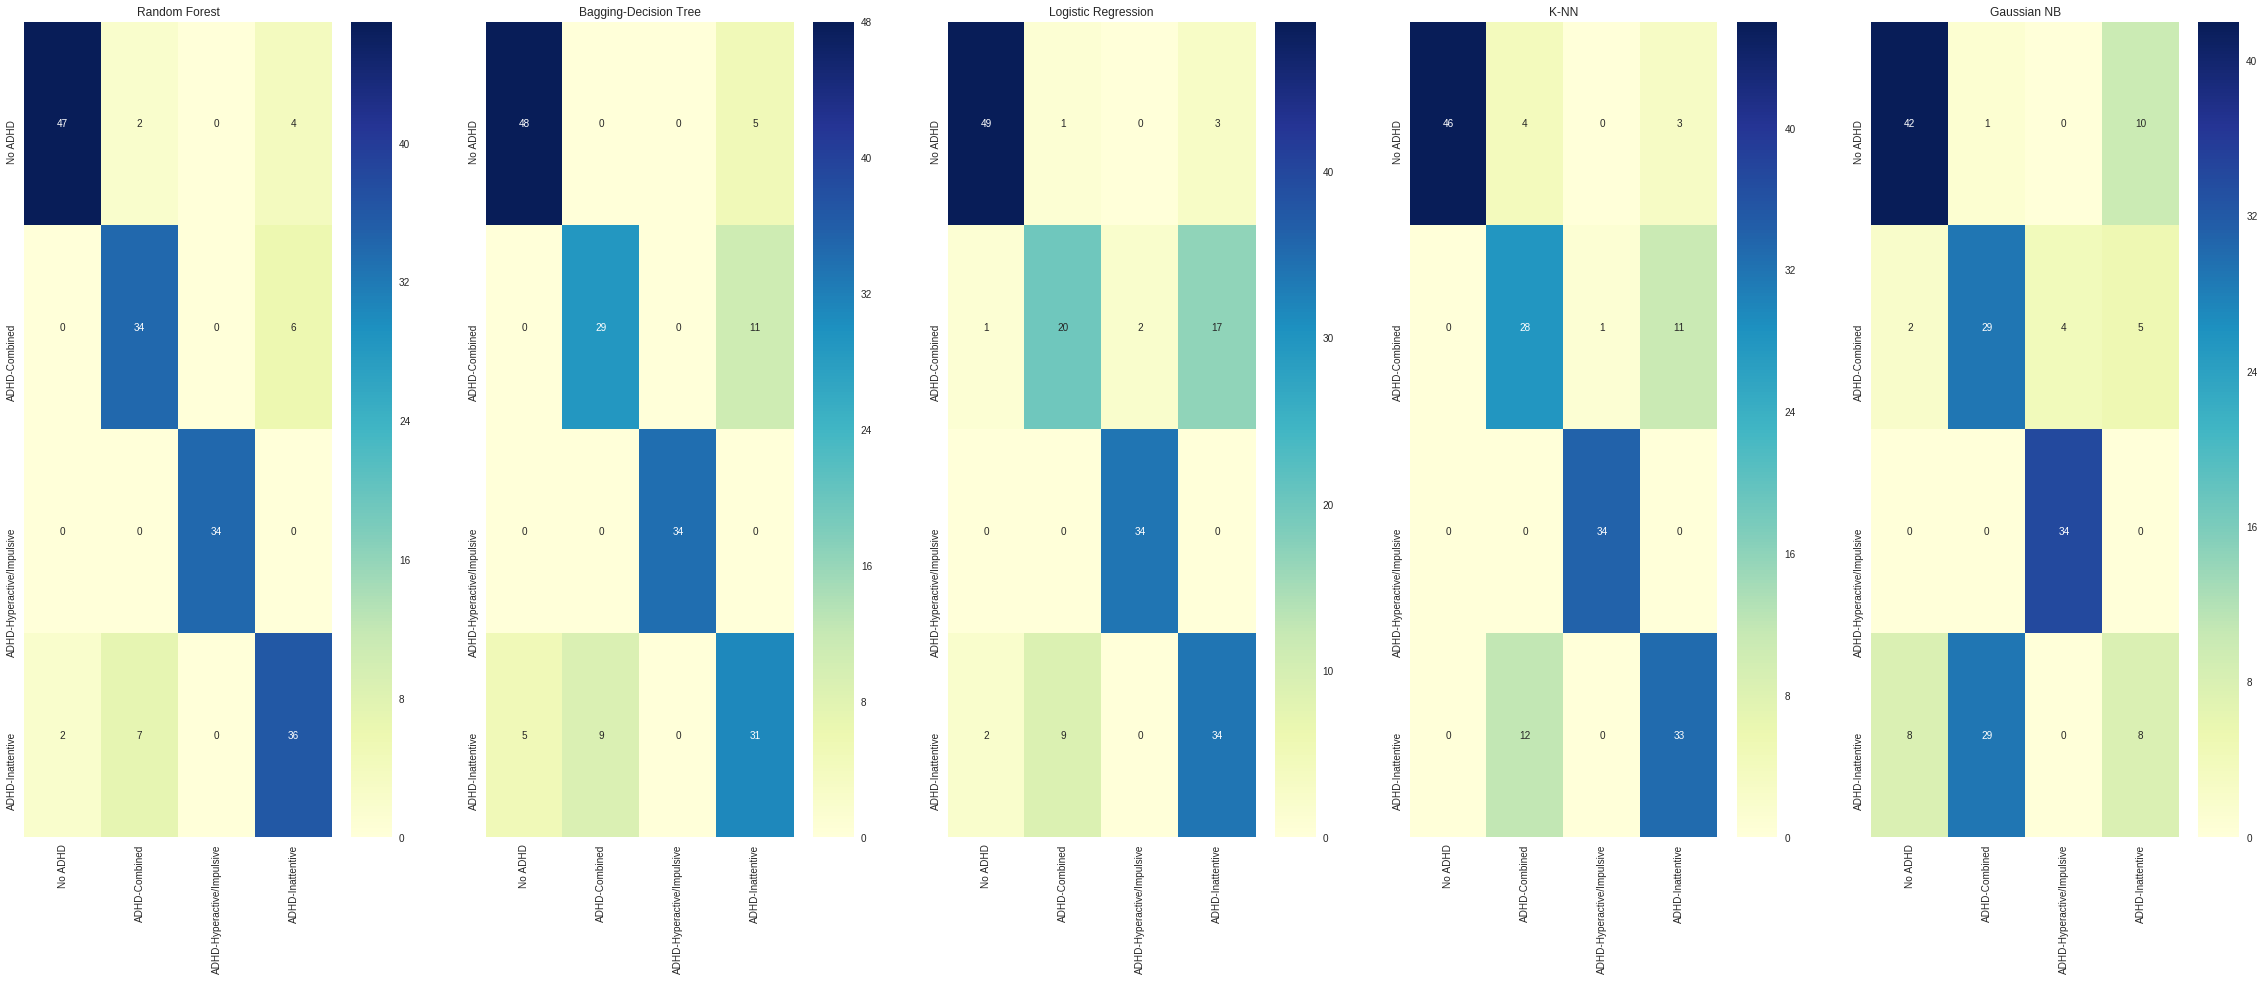

-------------------------------------
phenotypic_raw_feat


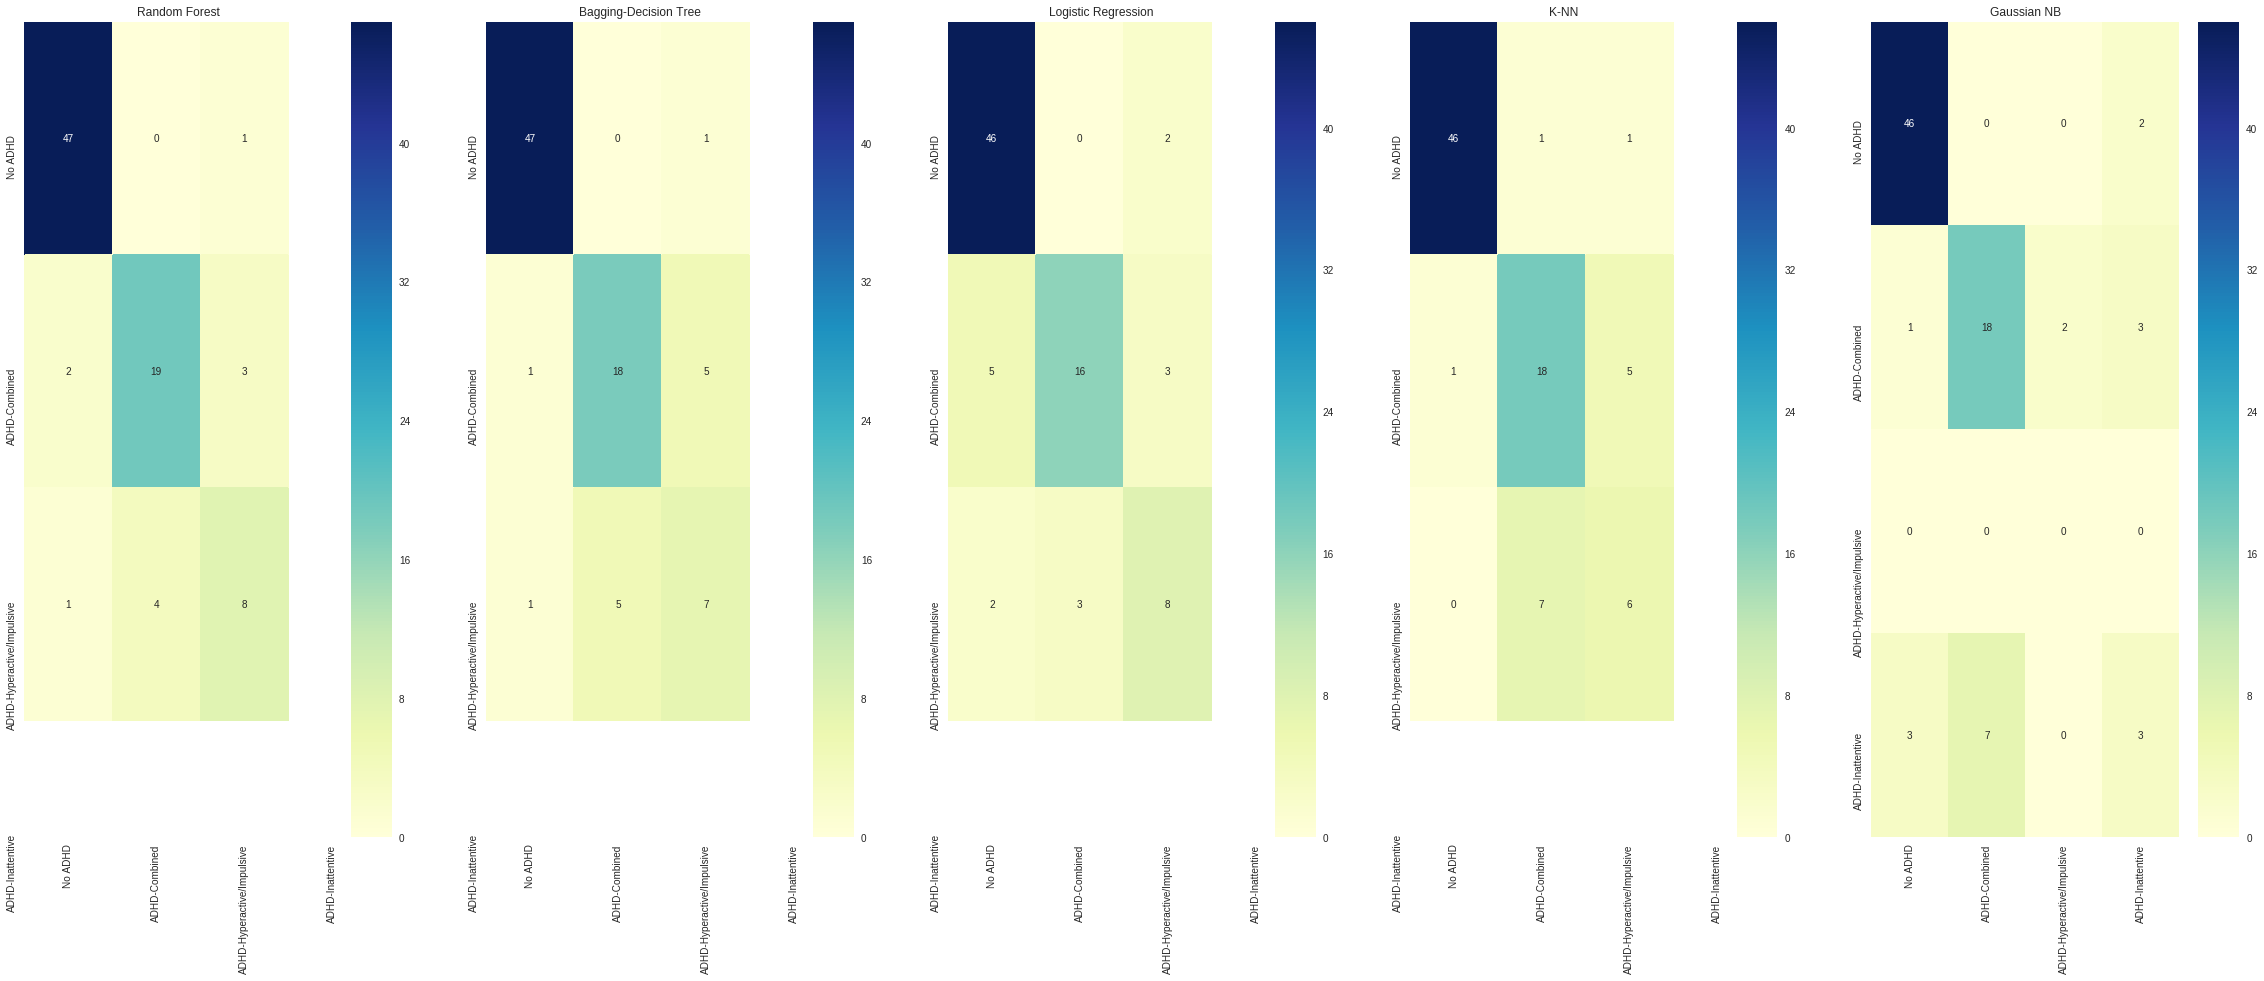

-------------------------------------
phenotypic_raw_feat_balanced


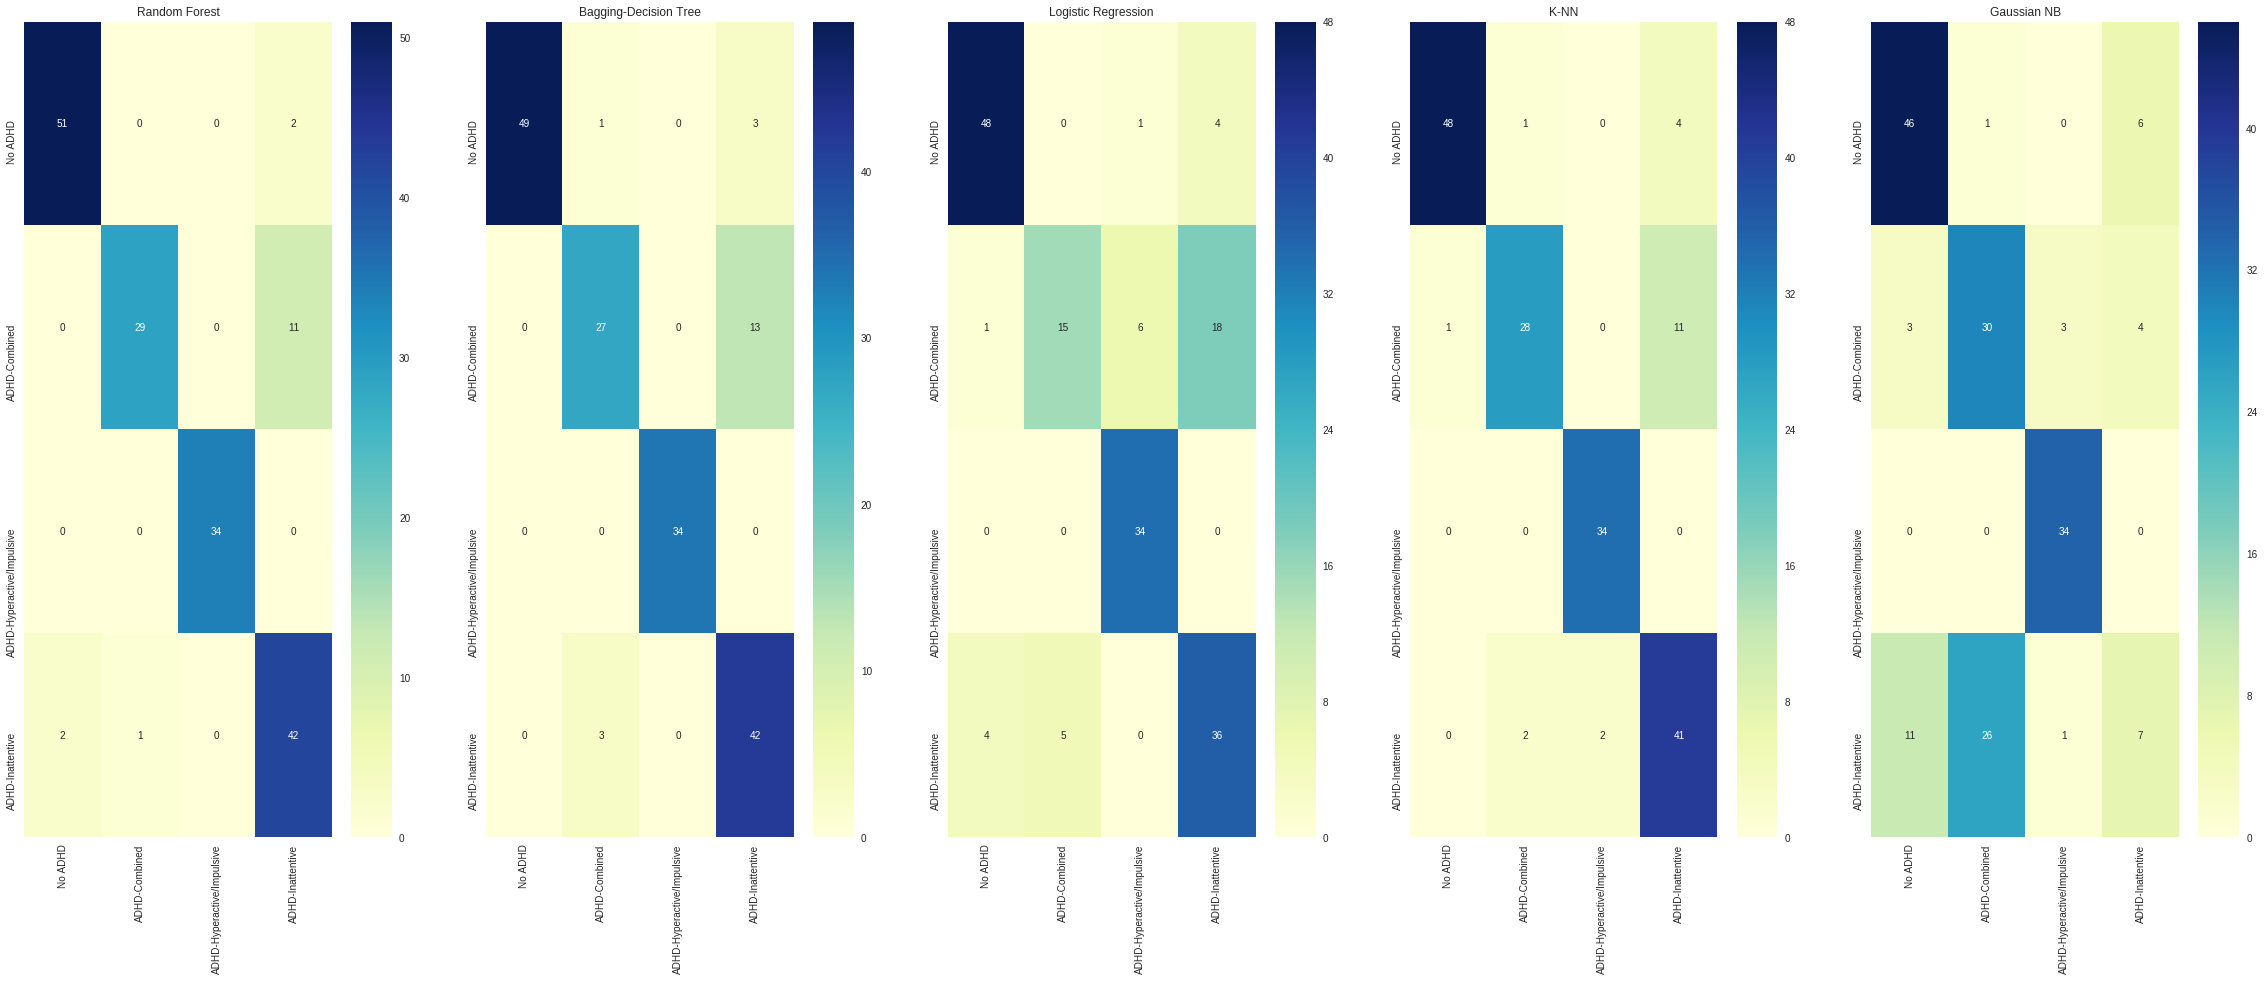

-------------------------------------
phenotypic_bin


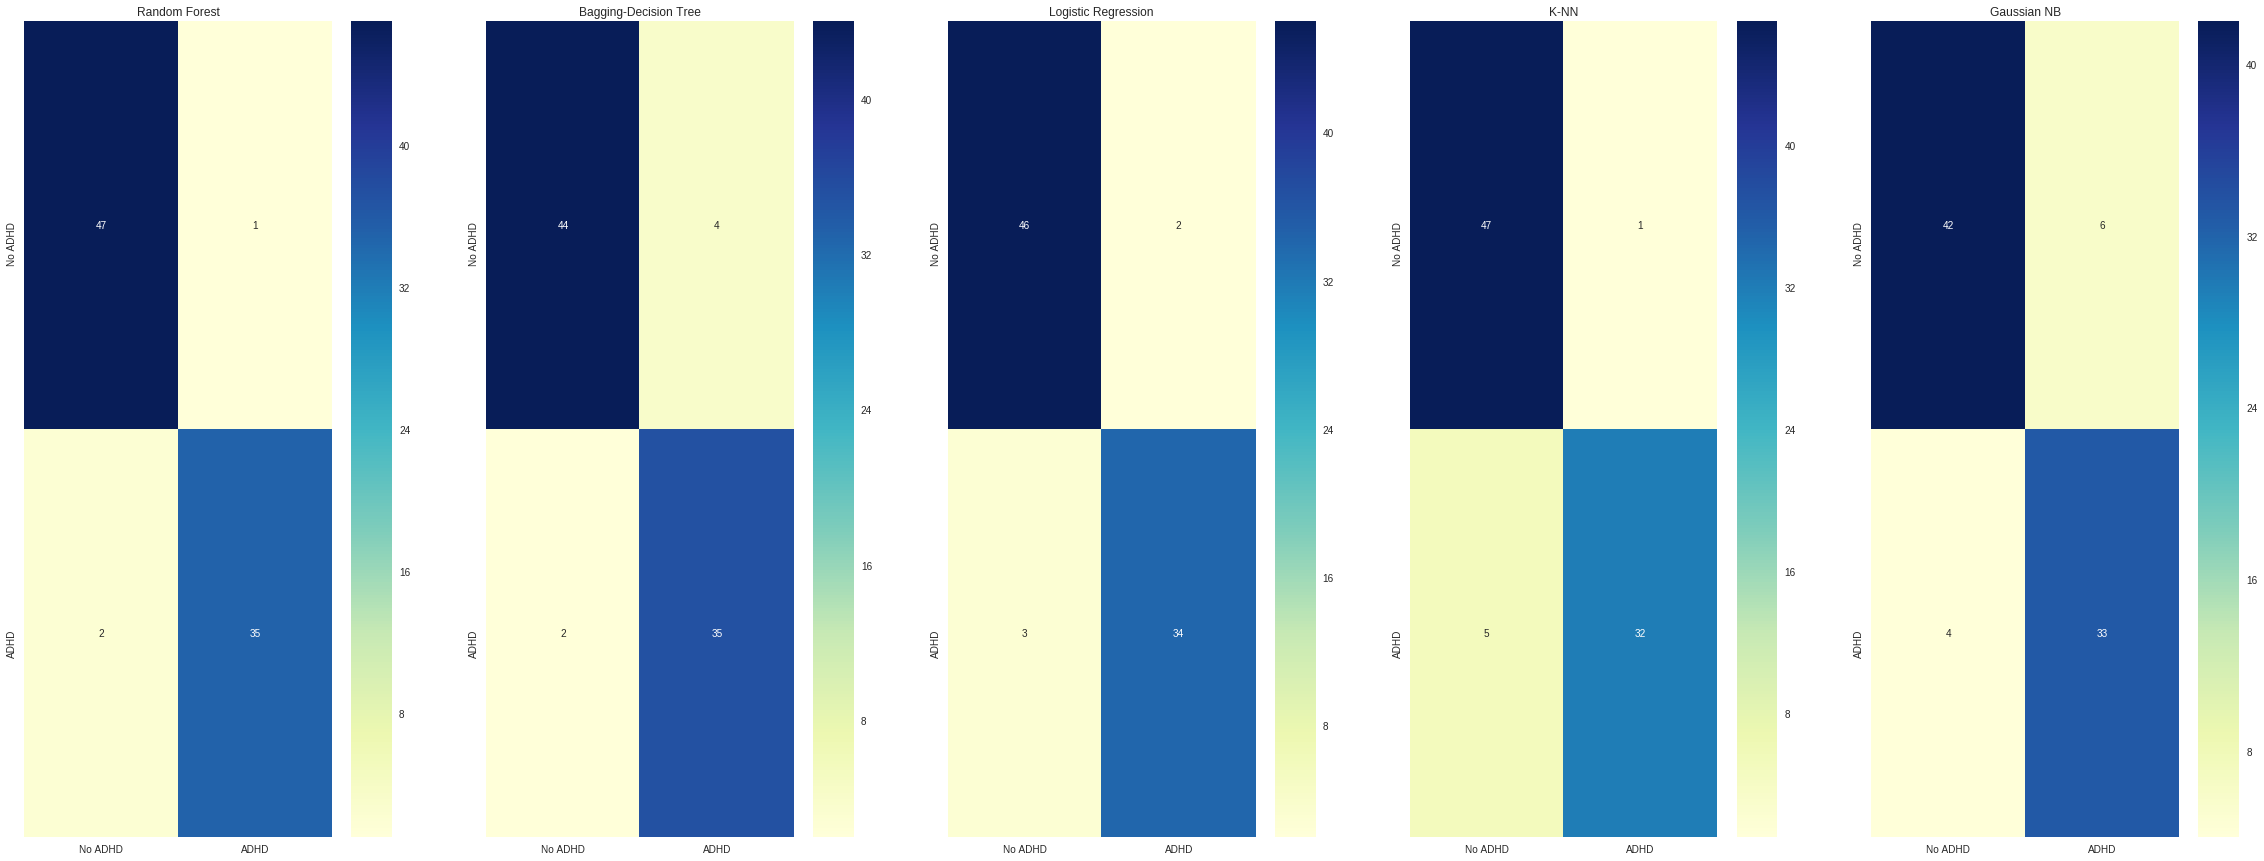

-------------------------------------
phenotypic_bin_balanced


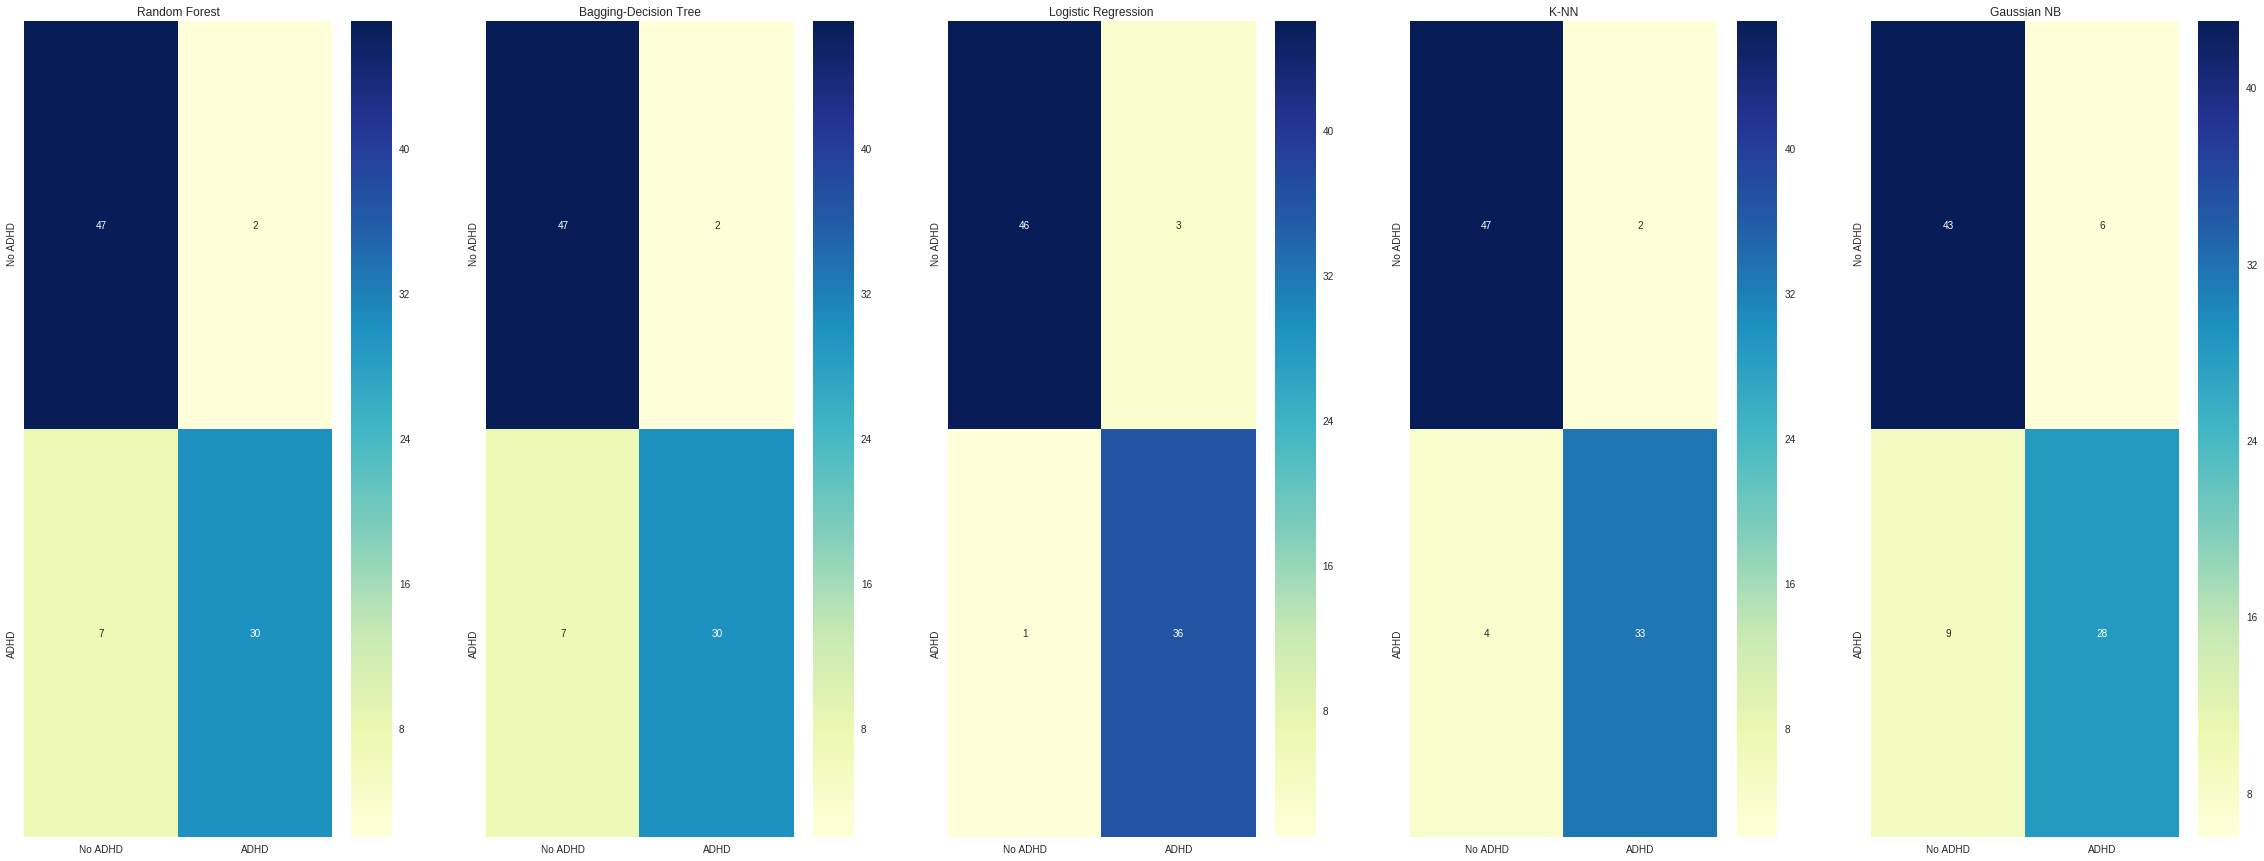

-------------------------------------
phenotypic_bin_feat


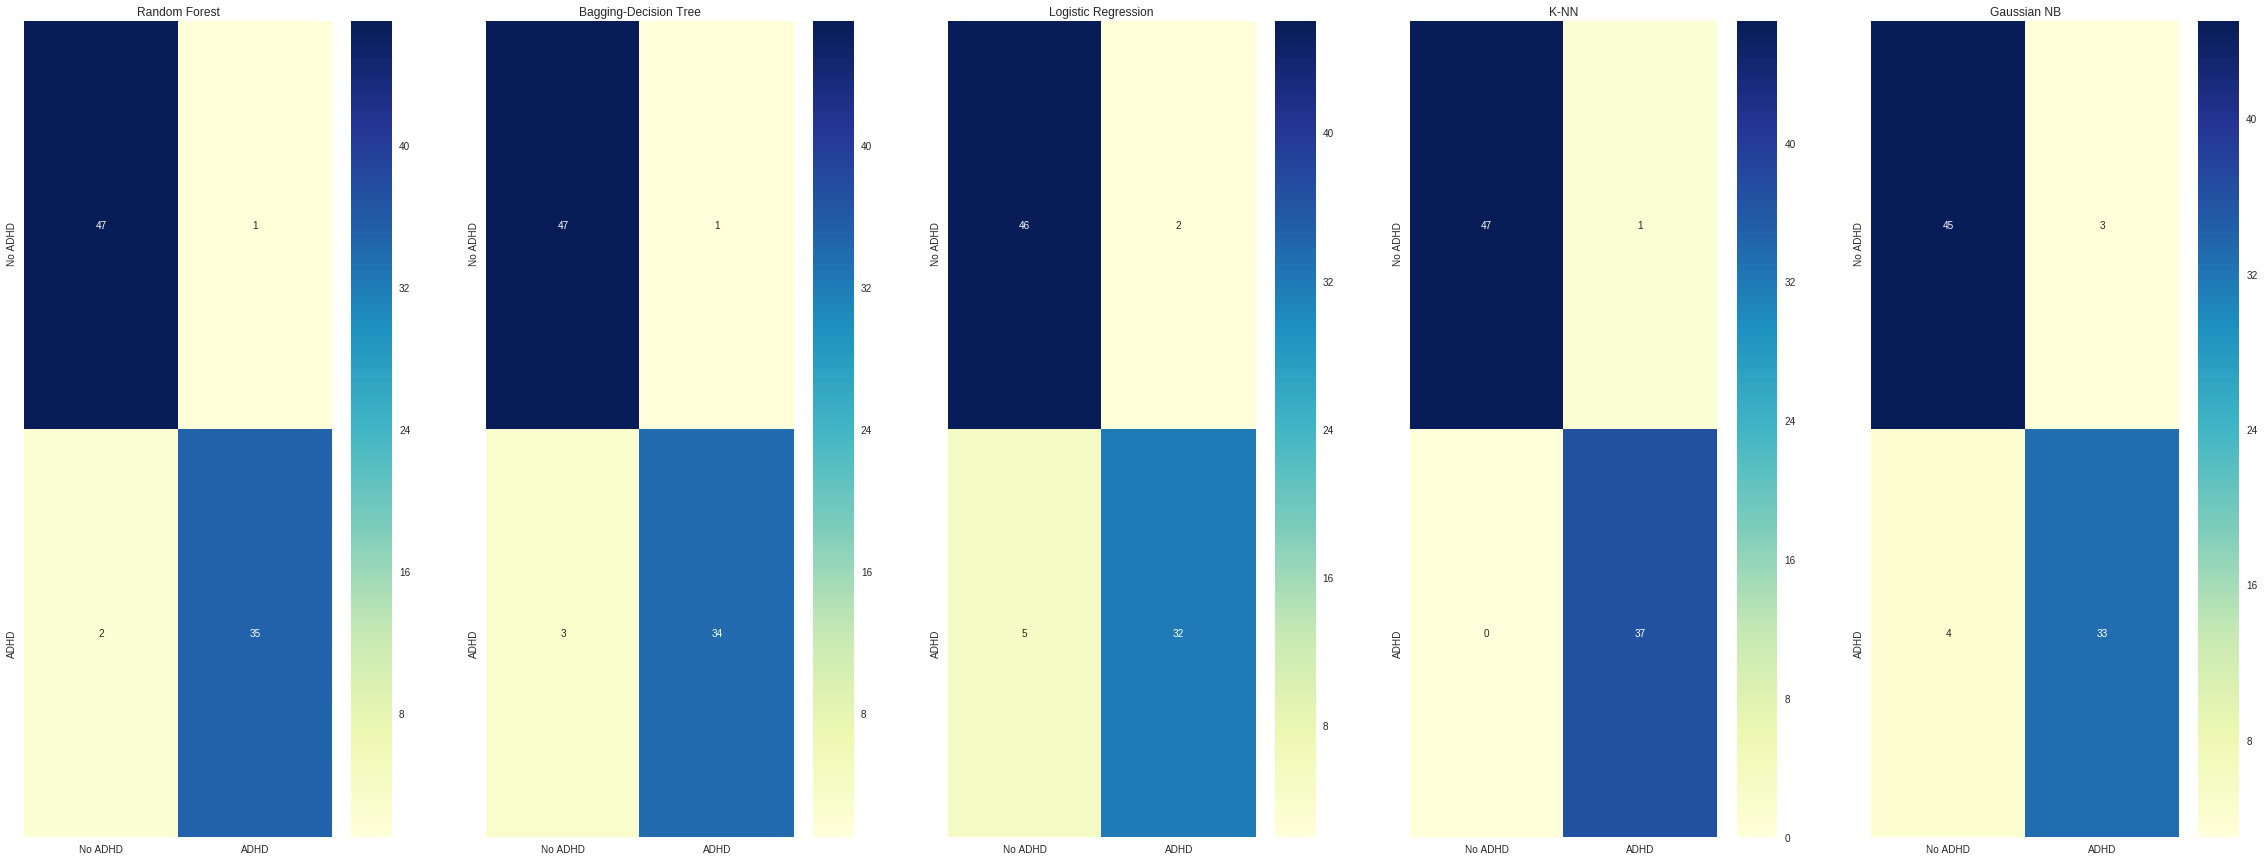

-------------------------------------
phenotypic_bin_feat_balanced


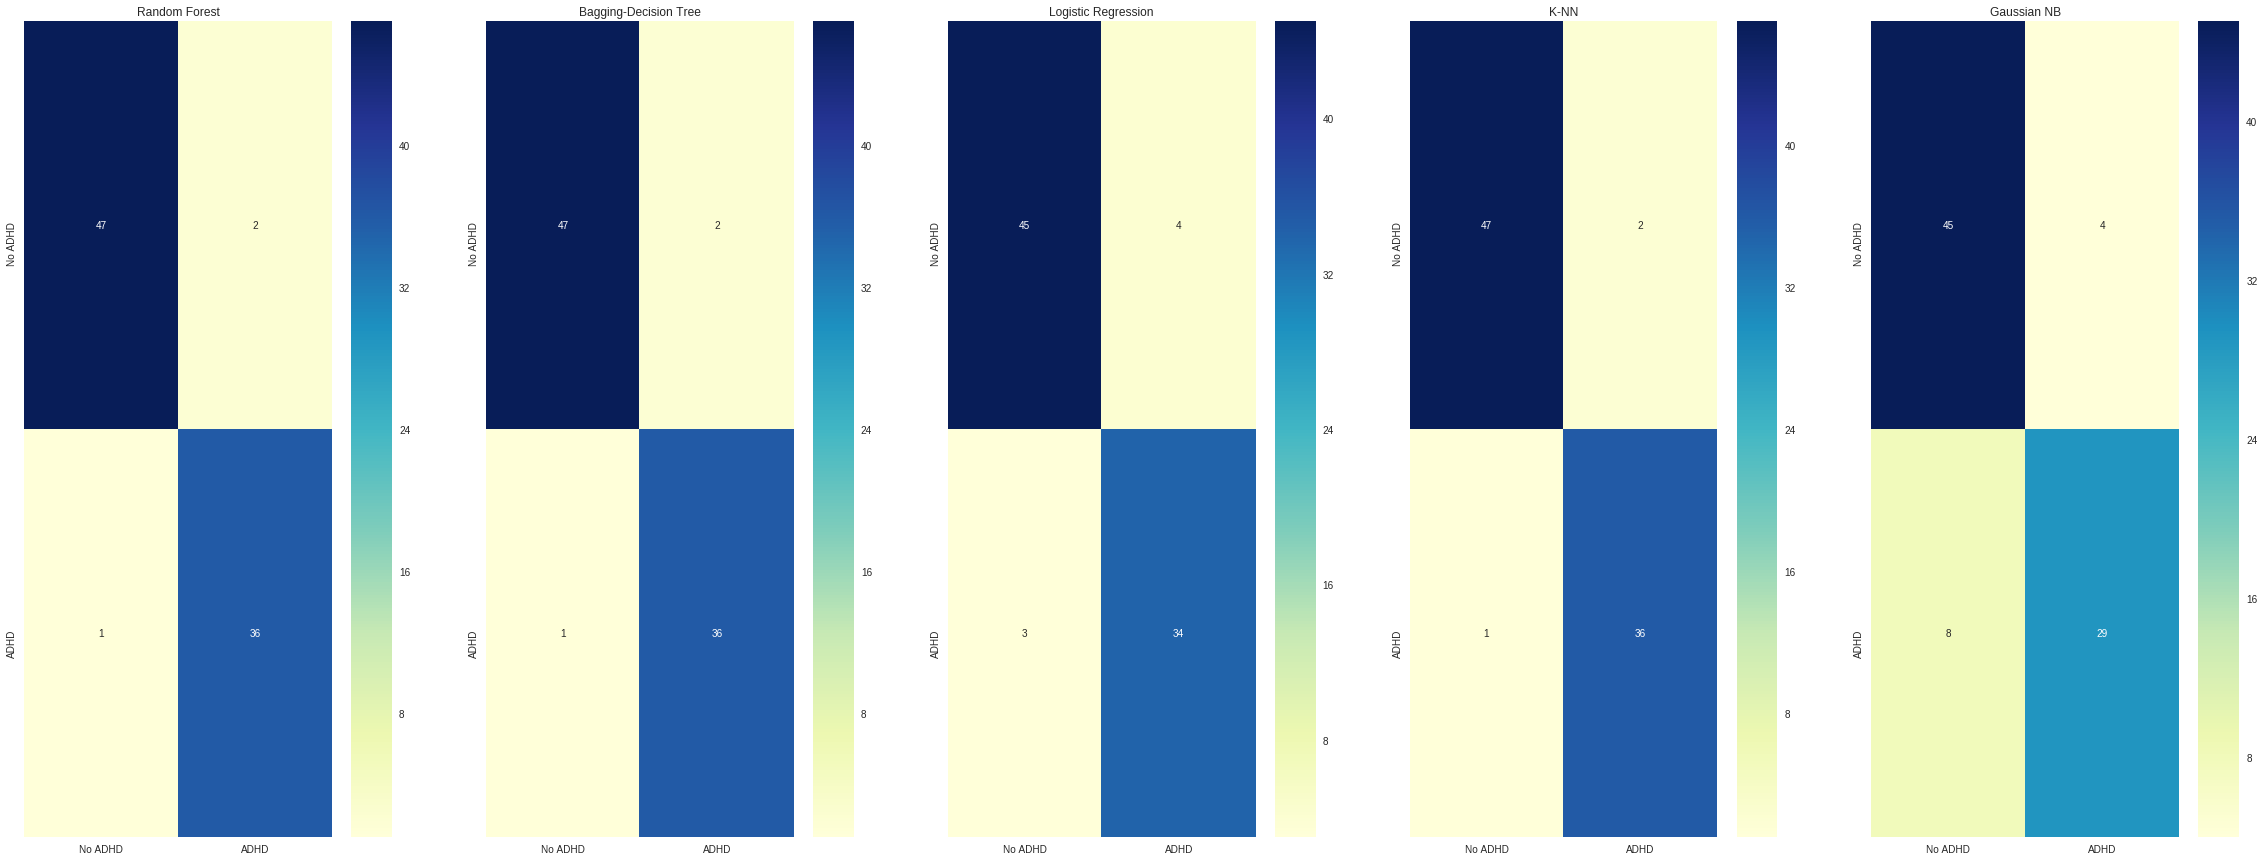

                                 data                  model  acccuracy  \
0                            alff_bin          Random Forest   0.803079   
1                            alff_bin  Bagging-Decision Tree   0.817191   
2                            alff_bin    Logistic Regression   0.720334   
3                            alff_bin                   K-NN   0.998076   
4                            alff_bin            Gaussian NB   0.659397   
5                   alff_bin_balanced          Random Forest   0.830797   
6                   alff_bin_balanced  Bagging-Decision Tree   0.850274   
7                   alff_bin_balanced    Logistic Regression   0.716981   
8                   alff_bin_balanced                   K-NN   0.998174   
9                   alff_bin_balanced            Gaussian NB   0.660986   
10                      alff_bin_feat          Random Forest   0.734445   
11                      alff_bin_feat  Bagging-Decision Tree   0.715202   
12                      a

In [10]:
scores_bin = pd.DataFrame()
scores_raw = pd.DataFrame()
for name,x_train,x_test,y_train,y_test,category in datasets:
    print('-------------------------------------')
    if category is "Raw":
        print('{}'.format(name))
        score = fit_raw_model(name,x_train,x_test,y_train,y_test)
        scores_raw = pd.concat([scores_raw, score],ignore_index=True)
    elif category is "Bin":
        print('{}'.format(name))
        score = fit_bin_model(name,x_train,x_test,y_train,y_test)
        scores_bin = pd.concat([scores_bin, score],ignore_index=True)
print(scores_bin)
print(scores_raw)

In [11]:
scores_bin.groupby('data').describe()

acccuracy                                \
                                      count      mean       std       min   
data                                                                        
alff_bin                                5.0  0.799615  0.128115  0.659397   
alff_bin_balanced                       5.0  0.811442  0.130682  0.660986   
alff_bin_feat                           5.0  0.702117  0.123325  0.586273   
alff_bin_feat_balanced                  5.0  0.717346  0.120317  0.604991   
alff_phenotypic_bin                     5.0  0.933904  0.122864  0.714897   
alff_phenotypic_bin_balanced            5.0  0.935318  0.119044  0.722911   
alff_phenotypic_bin_feat                5.0  0.959247  0.066543  0.844178   
alff_phenotypic_bin_feat_balanced       5.0  0.957651  0.062942  0.850289   
phenotypic_bin                          5.0  0.929412  0.029994  0.882353   
phenotypic_bin_balanced                 5.0  0.900000  0.048364  0.825581   
phenotypic_bin_feat                     5.0  0.948235  0.030679  0.917647   
phenotypic_bin_feat_balanced            5.0  0.934884  0.046220  0.860465   

                                                                           \
                                        25%       50%       75%       max   
data                                                                        
alff_bin                           0.720334  0.803079  0.817191  0.998076   
alff_bin_balanced                  0.716981  0.830797  0.850274  0.998174   
alff_bin_feat                      0.589480  0.715202  0.734445  0.885183   
alff_bin_feat_balanced             0.614121  0.727937  0.737675  0.902009   
alff_phenotypic_bin                0.972603  0.987158  0.994863  1.000000   
alff_phenotypic_bin_balanced       0.976840  0.985112  0.991729  1.000000   
alff_phenotypic_bin_feat           0.958904  0.993151  1.000000  1.000000   
alff_phenotypic_bin_feat_balanced  0.952026  0.992556  0.993383  1.000000   
phenotypic_bin                     0.929412  0.929412  0.941176  0.964706   
phenotypic_bin_balanced            0.895349  0.895349  0.930233  0.953488   
phenotypic_bin_feat                0.917647  0.952941  0.964706  0.988235   
phenotypic_bin_feat_balanced       0.918605  0.965116  0.965116  0.965116   

                                  recall            ...        f1            \
                                   count      mean  ...       75%       max   
data                                                ...                       
alff_bin                             5.0  0.767794  ...  0.793926  0.997966   
alff_bin_balanced                    5.0  0.807626  ...  0.842510  0.998154   
alff_bin_feat                        5.0  0.617050  ...  0.686364  0.866914   
alff_bin_feat_balanced               5.0  0.686101  ...  0.723895  0.894149   
alff_phenotypic_bin                  5.0  0.951943  ...  0.994700  1.000000   
alff_phenotypic_bin_balanced         5.0  0.958689  ...  0.991817  1.000000   
alff_phenotypic_bin_feat             5.0  0.954064  ...  1.000000  1.000000   
alff_phenotypic_bin_feat_balanced    5.0  0.958689  ...  0.993453  1.000000   
phenotypic_bin                       5.0  0.913514  ...  0.931507  0.958904   
phenotypic_bin_balanced              5.0  0.848649  ...  0.916667  0.947368   
phenotypic_bin_feat                  5.0  0.924324  ...  0.958904  0.986667   
phenotypic_bin_feat_balanced         5.0  0.924324  ...  0.960000  0.960000   

                                    auc                                \
                                  count      mean       std       min   
data                                                                    
alff_bin                            5.0  0.798043  0.127693  0.660848   
alff_bin_balanced                   5.0  0.811403  0.130479  0.661359   
alff_bin_feat                       5.0  0.697915  0.122377  0.583984   
alff_bin_feat_balanced              5.0  0.717026  0.119988  0.605018   
alff_phenotypic_bin      

In [12]:
scores_raw.groupby('data').describe()

acccuracy                                \
                                      count      mean       std       min   
data                                                                        
alff_phenotypic_raw                     5.0  0.899829  0.157618  0.621575   
alff_phenotypic_raw_balanced            5.0  0.916129  0.150092  0.650538   
alff_phenotypic_raw_feat                5.0  0.906164  0.115634  0.722603   
alff_phenotypic_raw_feat_balanced       5.0  0.912572  0.131321  0.697270   
alff_raw                                5.0  0.738165  0.177329  0.509942   
alff_raw_balanced                       5.0  0.834206  0.174058  0.583384   
alff_raw_feat                           5.0  0.640154  0.133914  0.513791   
alff_raw_feat_balanced                  5.0  0.740779  0.216686  0.495740   
phenotypic_raw                          5.0  0.797647  0.041092  0.729412   
phenotypic_raw_balanced                 5.0  0.795349  0.082877  0.656977   
phenotypic_raw_feat                     5.0  0.830588  0.030679  0.788235   
phenotypic_raw_feat_balanced            5.0  0.824419  0.095657  0.680233   

                                                                           \
                                        25%       50%       75%       max   
data                                                                        
alff_phenotypic_raw                0.931507  0.963185  0.982877  1.000000   
alff_phenotypic_raw_balanced       0.944996  0.989247  0.995864  1.000000   
alff_phenotypic_raw_feat           0.862158  0.965753  0.980308  1.000000   
alff_phenotypic_raw_feat_balanced  0.875517  0.992969  0.997105  1.000000   
alff_raw                           0.658756  0.753688  0.773573  0.994869   
alff_raw_balanced                  0.723981  0.930919  0.936093  0.996652   
alff_raw_feat                      0.549070  0.630532  0.649775  0.857601   
alff_raw_feat_balanced             0.513086  0.880402  0.885575  0.929093   
phenotypic_raw                     0.800000  0.800000  0.823529  0.835294   
phenotypic_raw_balanced            0.796512  0.819767  0.825581  0.877907   
phenotypic_raw_feat                0.823529  0.823529  0.847059  0.870588   
phenotypic_raw_feat_balanced       0.773256  0.877907  0.883721  0.906977   

                                  macro-average recall            ...  \
                                                 count      mean  ...   
data                                                              ...   
alff_phenotypic_raw                                5.0  0.892859  ...   
alff_phenotypic_raw_balanced                       5.0  0.915438  ...   
alff_phenotypic_raw_feat                           5.0  0.845002  ...   
alff_phenotypic_raw_feat_balanced                  5.0  0.911916  ...   
alff_raw                                           5.0  0.663524  ...   
alff_raw_balanced                                  5.0  0.835045  ...   
alff_raw_feat                                      5.0  0.483185  ...   
alff_raw_feat_balanced                             5.0  0.742158  ...   
phenotypic_raw                                     5.0  0.544525  ...   
phenotypic_raw_balanced                            5.0  0.801646  ...   
phenotypic_raw_feat                                5.0  0.701229  ...   
phenotypic_raw_feat_balanced                       5.0  0.826219  ...   

                                  macro-average f1           micro-average f1  \
                                               75%       max            count   
data                                                                            
alff_phenotypic_raw                       0.943712  1.000000              5.0   
alff_phenotypic_raw_balanced              0.995908  1.000000              5.0   
alff_phenotypic_raw_feat                  0.962461  1.000000              5.0   
alff_phenotypic_raw_feat_balanced         0.997087  1.000000              5.0   
alff_raw                                  0.663652  0.99279

In [13]:
def svc_param_selection(x_train, x_test, y_train, y_test, nfolds):
    svm = SVC()
    #Cs = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 10]
    Cs = [0.001, 0.01, 0.1, 1]
    #gammas = [0.001, 0.01, 0.1, 1, 2]
    gammas = [0.001, 0.01, 'auto']
    kernel = ['linear', 'rbf', 'sigmoid']
    decision_function_shape = ['ovo']
    #decision_function_shape = ['ovr']
    #shrinking = [True, False]
    shrinking = [True]
    param_grid = {'kernel': kernel,'C': Cs, 'gamma' : gammas,'decision_function_shape': decision_function_shape,
                  'shrinking': shrinking}
    grid_search = GridSearchCV(svm, param_grid, cv=nfolds)
    grid_search.fit(x_train, y_train)
    print('acccuracy score: {}'.format(grid_search.score(x_test,y_test)))
    print(grid_search.best_params_)
    #return grid_search.best_params_

In [14]:
def fit_svm(name, x_train, x_test, y_train, y_test, param, category):
    Cs = [1,0.01,0.1]
    gammas = [0.001,0.01,'auto']
    kernel = ['linear','rbf']
    if category is "Bin":
        scores = pd.DataFrame(columns=['data','model','acccuracy','recall','precision','f1','auc', 'confusion matrix'])
    elif category is "Raw":
        scores = pd.DataFrame(columns=['data','model','acccuracy','macro-average recall','micro-average recall','macro-average precision',
                                   'micro-average precision','macro-average f1','micro-average f1', 'confusion matrix'])
    if param is 1 and category is "Bin":
        svm = SVC(C=Cs[0],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 2 and category is "Bin":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[1],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 3 and category is "Bin":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[2],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 4 and category is "Bin":
        svm = SVC(C=Cs[1],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 5 and category is "Bin":
        svm = SVC(C=Cs[2],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 6 and category is "Bin":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred),
                                         precision_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 1 and category is "Raw":
        svm = SVC(C=Cs[0],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 2 and category is "Raw":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[1],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 3 and category is "Raw":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[2],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 4 and category is "Raw":
        svm = SVC(C=Cs[1],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 5 and category is "Raw":
        svm = SVC(C=Cs[2],kernel=kernel[0],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    elif param is 6 and category is "Raw":
        svm = SVC(C=Cs[0],kernel=kernel[1],gamma=gammas[0],shrinking=True,decision_function_shape='ovo')
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        scores = scores.append(pd.Series([name, 'SVM', svm.score(x_test, y_test), recall_score(y_test, y_pred, average='macro'),
                                          recall_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'),
                                          precision_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'),
                                          f1_score(y_test, y_pred, average='micro'),cm],
                                         index=scores.columns ), ignore_index=True)
    
    return scores
        

In [15]:
'''
for name,x_train,x_test,y_train,y_test,category in datasets:
    print('-------------------------------------')
    print('{}'.format(name))
    svc_param_selection(x_train, x_test, y_train, y_test, 5)
'''


"\nfor name,x_train,x_test,y_train,y_test,category in datasets:\n    print('-------------------------------------')\n    print('{}'.format(name))\n    svc_param_selection(x_train, x_test, y_train, y_test, 5)\n"

In [16]:
scores_bin_svm = pd.DataFrame()
scores_raw_svm = pd.DataFrame()
i=0
param=[1,2,1,3,2,2,3,3,2,2,3,3,2,2,3,3,1,2,4,3,5,5,6,6]
for name,x_train,x_test,y_train,y_test,category in datasets:
    print('-------------------------------------')
    if category is "Raw":
        print('{}'.format(name))
        score = fit_svm(name,x_train,x_test,y_train,y_test,param[i],category)
        scores_raw_svm = pd.concat([scores_raw_svm, score],ignore_index=True)
    elif category is "Bin":
        print('{}'.format(name))
        score = fit_svm(name,x_train,x_test,y_train,y_test,param[i],category)
        scores_bin_svm = pd.concat([scores_bin_svm, score],ignore_index=True)
    i += 1
print(scores_bin_svm)
print(scores_raw_svm)

-------------------------------------
alff_raw
-------------------------------------
alff_raw_balanced
-------------------------------------
alff_raw_feat
-------------------------------------
alff_raw_feat_balanced
-------------------------------------
alff_bin
-------------------------------------
alff_bin_balanced
-------------------------------------
alff_bin_feat
-------------------------------------
alff_bin_feat_balanced
-------------------------------------
alff_phenotypic_raw
-------------------------------------
alff_phenotypic_raw_balanced
-------------------------------------
alff_phenotypic_raw_feat
-------------------------------------
alff_phenotypic_raw_feat_balanced
-------------------------------------
alff_phenotypic_bin
-------------------------------------
alff_phenotypic_bin_balanced
-------------------------------------
alff_phenotypic_bin_feat
-------------------------------------
alff_phenotypic_bin_feat_balanced
-------------------------------------
phenotypic

In [17]:
score_bin = pd.concat([scores_bin, scores_bin_svm], ignore_index=True)
score_raw = pd.concat([scores_raw, scores_raw_svm], ignore_index=True)
print(score_bin)
print(score_raw)

                                 data                  model  acccuracy  \
0                            alff_bin          Random Forest   0.803079   
1                            alff_bin  Bagging-Decision Tree   0.817191   
2                            alff_bin    Logistic Regression   0.720334   
3                            alff_bin                   K-NN   0.998076   
4                            alff_bin            Gaussian NB   0.659397   
5                   alff_bin_balanced          Random Forest   0.830797   
6                   alff_bin_balanced  Bagging-Decision Tree   0.850274   
7                   alff_bin_balanced    Logistic Regression   0.716981   
8                   alff_bin_balanced                   K-NN   0.998174   
9                   alff_bin_balanced            Gaussian NB   0.660986   
10                      alff_bin_feat          Random Forest   0.734445   
11                      alff_bin_feat  Bagging-Decision Tree   0.715202   
12                      a

In [18]:
score_bin.to_excel('scores_bin_ML.xlsx')
score_raw.to_excel('scores_multiclass_ML.xlsx')

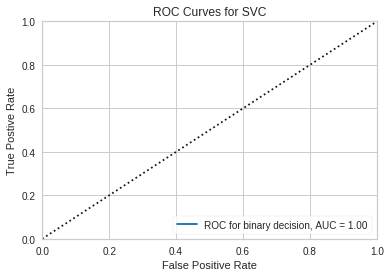

In [25]:
from yellowbrick.classifier import ROCAUC
classes = ['Non ADHD', 'ADHD']
visualizer = ROCAUC(SVC(), classes=classes, micro=False, macro=False, per_class=False)
visualizer.fit(x_apbfb_train, y_apbfb_train)  # Fit the training data to the visualizer
visualizer.score(x_apbfb_test, y_apbfb_test)  # Evaluate the model on the test data
g = visualizer.poof() 

                                  data                  model    Measure  \
0                             alff_bin          Random Forest  acccuracy   
1                             alff_bin  Bagging-Decision Tree  acccuracy   
2                             alff_bin    Logistic Regression  acccuracy   
3                             alff_bin                   K-NN  acccuracy   
4                             alff_bin            Gaussian NB  acccuracy   
5                    alff_bin_balanced          Random Forest  acccuracy   
6                    alff_bin_balanced  Bagging-Decision Tree  acccuracy   
7                    alff_bin_balanced    Logistic Regression  acccuracy   
8                    alff_bin_balanced                   K-NN  acccuracy   
9                    alff_bin_balanced            Gaussian NB  acccuracy   
10                       alff_bin_feat          Random Forest  acccuracy   
11                       alff_bin_feat  Bagging-Decision Tree  acccuracy   
12          

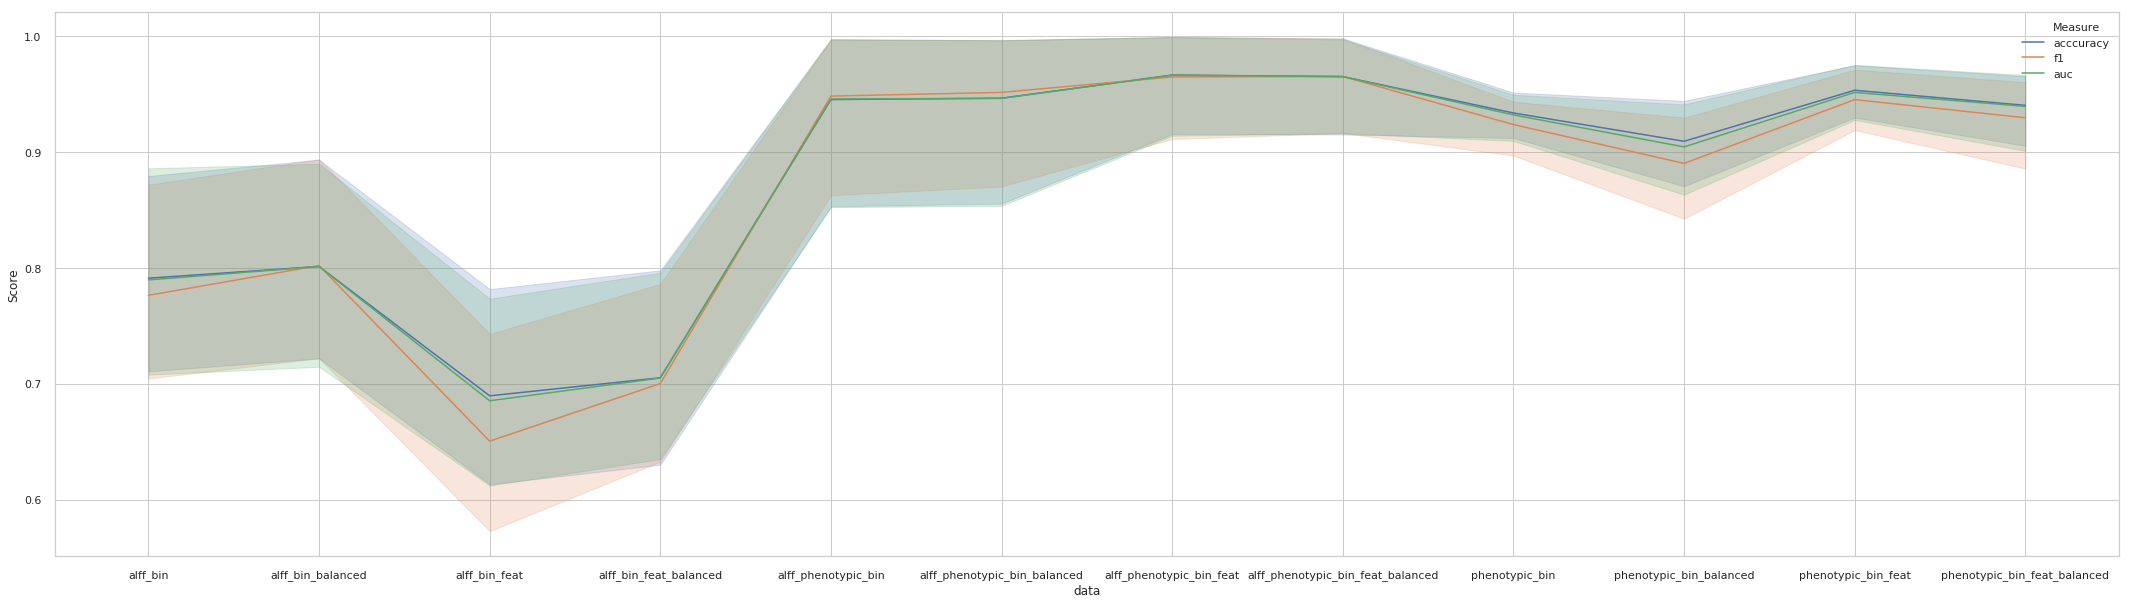

In [70]:
scores_melted = score_bin[['data','model','acccuracy','f1','auc']].copy()
scores_melted = pd.melt(scores_melted, id_vars=['data','model'],var_name='Measure',value_name='Score')
print(scores_melted)
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 35})
g= plt.figure(figsize=(37,10))
g = sns.lineplot(x="data", y="Score",
             hue="Measure",data=scores_melted)


                                  data                  model  \
0                             alff_raw          Random Forest   
1                             alff_raw  Bagging-Decision Tree   
2                             alff_raw    Logistic Regression   
3                             alff_raw                   K-NN   
4                             alff_raw            Gaussian NB   
5                    alff_raw_balanced          Random Forest   
6                    alff_raw_balanced  Bagging-Decision Tree   
7                    alff_raw_balanced    Logistic Regression   
8                    alff_raw_balanced                   K-NN   
9                    alff_raw_balanced            Gaussian NB   
10                       alff_raw_feat          Random Forest   
11                       alff_raw_feat  Bagging-Decision Tree   
12                       alff_raw_feat    Logistic Regression   
13                       alff_raw_feat                   K-NN   
14                       

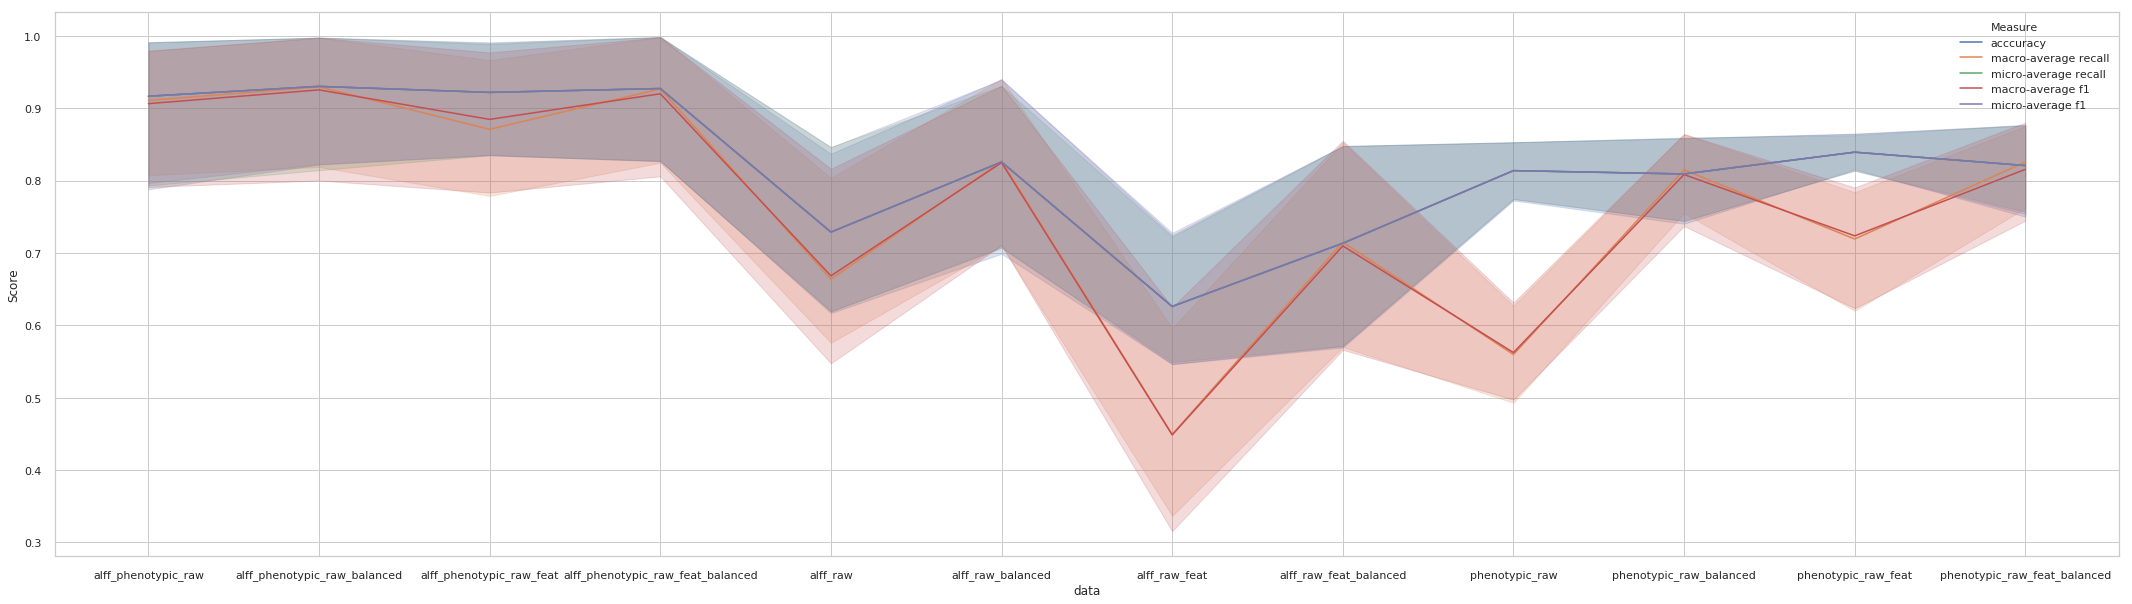

In [71]:
scores_melted = score_raw[['data','model','acccuracy','macro-average recall','micro-average recall','macro-average f1','micro-average f1']].copy()
scores_melted = pd.melt(scores_melted, id_vars=['data','model'],var_name='Measure',value_name='Score')
print(scores_melted)
import seaborn as sns
sns.set(style="whitegrid")
g= plt.figure(figsize=(37,10))
g = sns.lineplot(x="data", y="Score",
             hue="Measure",data=scores_melted,
                markers=True, dashes=False,)


In [73]:
plt.savefig('qqqqq.png')

<Figure size 432x288 with 0 Axes>

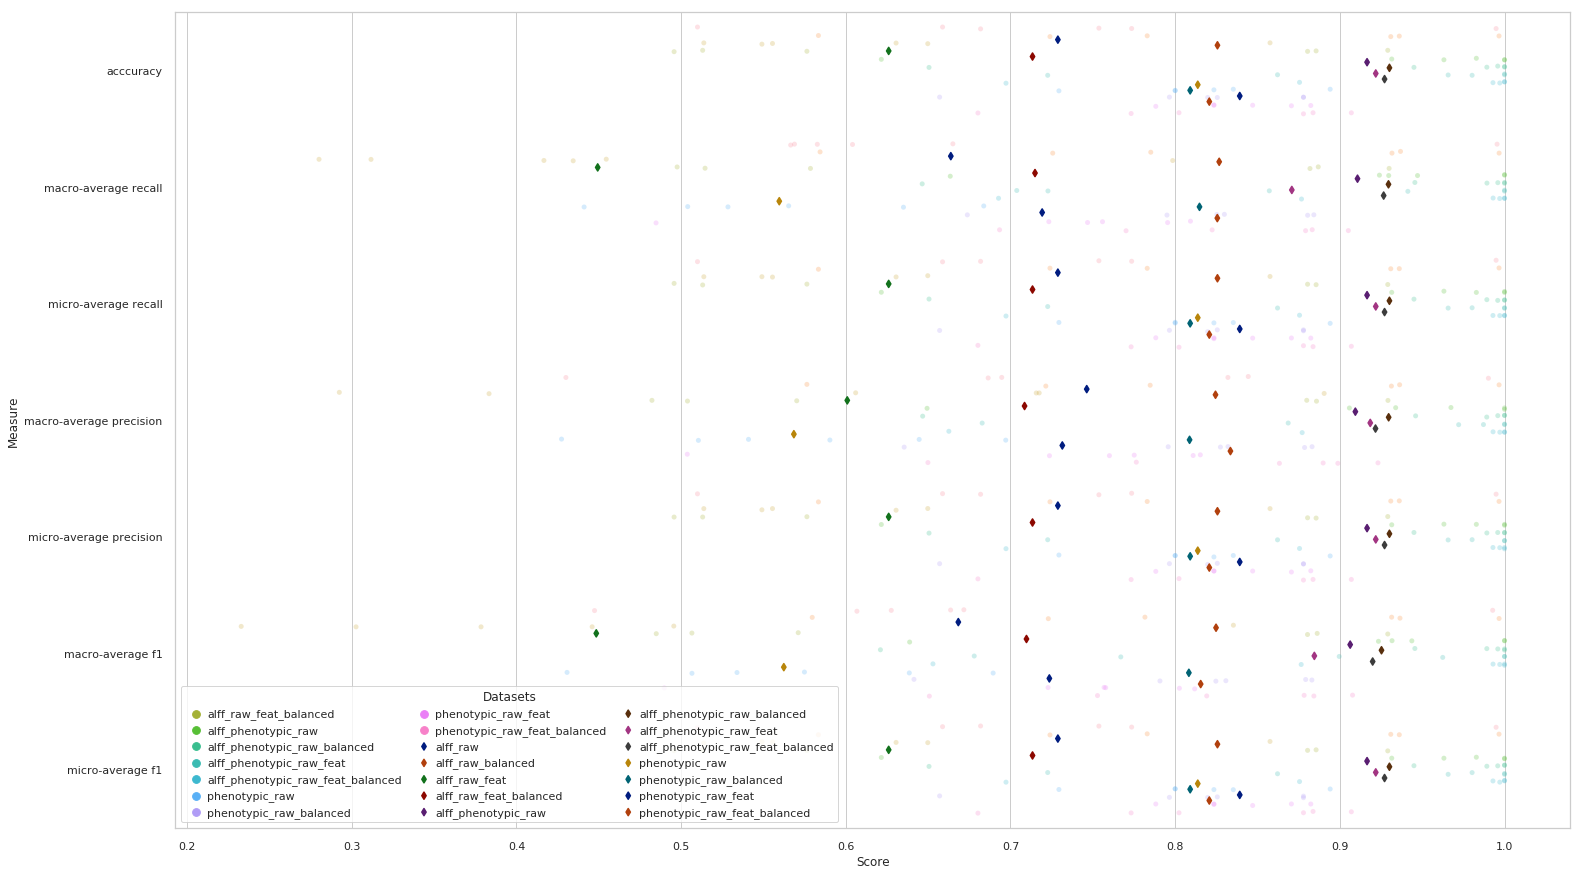

In [61]:
f, ax = plt.subplots(figsize=(25,15))
#sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Score", y="Measure", hue="data",
              data=scores_melted, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="Score", y="Measure", hue="data",
              data=scores_melted, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Datasets",
          handletextpad=0, columnspacing=1,
          loc="lower left", ncol=3, frameon=True)

def benchmark(sampling_type,X,y):
    lr = LogisticRegression(penalty = 'l1')
    param_grid = {'C':[0.01,0.1,1,10]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
    gs = gs.fit(X,y)
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled = transformer.fit_sample(X,y)
    return (transformer.__class__.__name__, X_resampled, y_resampled)

benchmark_scores = []
for sample_type,X,y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('______________________________________________________________')

scores = []
# train models based on benchmark params
for sampling_type,score,param in benchmark_scores:
    lr = LogisticRegression(penalty = 'l1',C=param)
    for s_type,X,y in datasets:
        if s_type == sampling_type:
            lr.fit(X,y)
            pred_test = lr.predict(x_bin_test)
            pred_test_probs = lr.predict_proba(x_bin_test)
            probs = lr.decision_function(x_bin_test)
            fpr, tpr, thresholds = roc_curve(y_bin_test,pred_test)
            p,r,t = precision_recall_curve(y_bin_test,probs)
            scores.append((sampling_type,
                           f1_score(y_bin_test,pred_test),
                           precision_score(y_bin_test,pred_test),
                           recall_score(y_bin_test,pred_test),
                           accuracy_score(y_bin_test,pred_test),
                           auc(fpr, tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_bin_test,pred_test)))

alff = alff[[42,43,38,39,40,41,68,69,78,79,76,77,74,75,72,73,58,59,32,33,34,35,36,37,'DX']].copy()
alff.columns = ['Amygdala_L','Amygdala_R','Hippocampus_L','Hippocampus_R','ParaHippocampal_L','ParaHippocampal_R',
               'Precuneus_L','Precuneus_R','Thalamus_L','Thalamus_R','Pallidum_L','Pallidum_R','Putamen_L','Putamen_R',
               'Caudate_L','Caudate_R','Postcentral_L','Postcentral_R','Cingulum_Ant_L','Cingulum_Ant_R',
               'Cingulum_Mid_L','Cingulum_Mid_R','Cingulum_Post_L','Cingulum_Post_R','DX']
alff.head()

alff_melted = pd.melt(alff, id_vars=['DX'], var_name="Measure", value_name="Score")

sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(55, 30))
alff_measure = sns.boxplot(x='Measure', y='Score', hue="DX", data=alff_melted, notch=True)
#alff_measure = sns.stripplot(x='Measure', y='Score', hue="DX", data=alff_melted, jitter=0.2, size=3)
sns.despine(offset=10, trim=True)
plt.title("ALFF Measure")
#alff_measure.get_figure().savefig('alff_measure.png')

alff_melted.head()

import scipy.stats  as stats
alff.groupby(['DX']).mean()
#stats.pearsonr(alff['Amygdala_L'].groupby(['DX']), alff['Amygdala_R'])